In [11]:
library(tidyverse)
library(sf)
setwd('/Share/user/picapica/marine_global_change/world_ocean_climate')

Linking to GEOS 3.12.0, GDAL 3.7.1, PROJ 9.2.1; sf_use_s2() is TRUE



In [8]:
obis_traits_imputed <- readRDS('../obis_traits_imputed_delete_NA_abund_and_traits.rds') %>% 
    filter(date_year > 1960)
biotime_traits_imputed <- read_csv('../biotime_traits_imputed.csv') %>% 
    filter(YEAR > 1960, STUDY_ID != 295, STUDY_ID != 359)
rls_traits_imputed <- read_csv('../rls_traits_imputed.csv') %>% 
    filter(year > 1960)

Rows: 211174 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): PLOT, SAMPLE_DESC, GENUS_SPECIES, binomial, genus, family
dbl (14): STUDY_ID, grid, YEAR, coverage, species_richness, year_span, ABUND...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1098878 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (19): FID, country, area, ecoregion, realm, location, site_code, site_n...
dbl  (22): grid, year, coverage, species_richness, year_span, survey_id, lat...
date  (2): survey_date, ymd
time  (1): hour

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [85]:
head(biotime_traits_imputed)

STUDY_ID grid    YEAR coverage  species_richness year_span ABUNDANCE BIOMASS
1 45       5269674 2006 0.8550883 220              9         1          22.40 
2 45       5269674 2006 0.8550883 220              9         2          60.30 
3 45       5269674 2006 0.8550883 220              9         1          22.40 
4 45       5269674 2006 0.8550883 220              9         1          30.10 
5 45       5269674 2006 0.8550883 220              9         1         140.90 
6 45       5269674 2006 0.8550883 220              9         5          24.19 
  LATITUDE LONGITUDE PLOT DEPTH
1 -17.5    -149      1    0    
2 -17.5    -149      1    0    
3 -17.5    -149      4    0    
4 -17.5    -149      1    0    
5 -17.5    -149      2    0    
6 -17.5    -149      1    0    
  SAMPLE_DESC                                                        
1 -17.5_-149_LTER_1_Backreef_Fish_Transect_1_Swath_5_m_12_7_2006     
2 -17.5_-149_LTER_1_Backreef_Fish_Transect_1_Swath_5_m_12_7_2006     
3 -17.5_-149_LTER_1_Backreef_Fish_Transect_4_Swath_5_m_12_7_2006     
4 -17.5_-149_LTER_3_Backreef_Fish_Transect_1_Swath_5_m_16_7_2006     
5 -17.5_-149_LTER_6_Fringing_Reef_Fish_Transect_2_Swath_5_m_12_7_2006
6 -17.5_-149_LTER_1_Backreef_Fish_Transect_1_Swath_5_m_12_7_2006     
  GENUS_SPECIES             binomial                  MaxLengthTL Troph
1 Abudefduf septemfasciatus Abudefduf septemfasciatus 23          3.01 
2 Abudefduf septemfasciatus Abudefduf septemfasciatus 23          3.01 
3 Abudefduf septemfasciatus Abudefduf septemfasciatus 23          3.01 
4 Abudefduf septemfasciatus Abudefduf septemfasciatus 23          3.01 
5 Abudefduf septemfasciatus Abudefduf septemfasciatus 23          3.01 
6 Abudefduf sexfasciatus    Abudefduf sexfasciatus    19          2.70 
  TempPrefMean_imputed genus     family       
1 28.6                 Abudefduf Pomacentridae
2 28.6                 Abudefduf Pomacentridae
3 28.6                 Abudefduf Pomacentridae
4 28.6                 Abudefduf Pomacentridae
5 28.6                 Abudefduf Pomacentridae
6 28.4                 Abudefduf Pomacentridae

In [9]:
grid_num <- union(obis_traits_imputed$grid, biotime_traits_imputed$grid) %>% union(rls_traits_imputed$grid)
n_distinct(grid_num)

[1] 10105

In [87]:
# time series number
select(obis_traits_imputed, dataset_name, grid) %>% n_distinct() # time series
obis_dataset_used <- select(obis_traits_imputed, dataset_name, grid) %>% pull(dataset_name) 
n_distinct(obis_dataset_used) # studies number

select(biotime_traits_imputed, STUDY_ID, grid) %>% n_distinct()
biotime_dataset_used <- select(biotime_traits_imputed, STUDY_ID, grid) %>% pull(STUDY_ID) 
n_distinct(biotime_dataset_used)

pull(rls_traits_imputed, grid) %>% n_distinct()

write.csv(unique(obis_dataset_used), '../output/obis_dataset_used.csv')
write.csv(unique(biotime_dataset_used), '../output/biotime_dataset_used.csv')

[1] 10759

[1] 68

[1] 251

[1] 13

[1] 368

# read grids

In [12]:
library(ggmagnify)
# library(ggforce)
sf_use_s2(FALSE)
# ocean_map <- rnaturalearth::ne_coastline(scale = 'large', returnclass = c("sf"))
ocean_map <- st_read('ne_10m_land//ne_10m_land.shp')

Spherical geometry (s2) switched off



Reading layer `ne_10m_land' from data source 
  `/Share/user/picapica/marine_global_change/world_ocean_climate/ne_10m_land/ne_10m_land.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 11 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -90 xmax: 180 ymax: 83.6341
Geodetic CRS:  WGS 84


In [13]:
library(dggridR)
dggs <- dgconstruct(res = 12, metric = FALSE)
grid <- dgcellstogrid(dggs, grid_num)  # shapefile grids for all fit 
grid_point <- st_centroid(grid)
grid_point_xy <- do.call(rbind, st_geometry(grid_point)) %>% 
    as_tibble() %>% cbind(grid_point$seqnum) %>% setNames(c("lon","lat", "seqnum"))

Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Warning message:
“st_centroid assumes attributes are constant over geometries”
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


In [15]:
head(grid_point_xy)
write.csv(grid_point_xy, 'grid_point_xy.csv', row.names = F)

lon      lat      seqnum
1 11.25000 58.28252    1  
2 11.25000 58.44993  729  
3 11.07068 58.49421 1458  
4 11.07744 58.40684 1459  
5 10.88943 58.70560 2185  
6 10.89015 58.62278 2186

# tempPref

In [91]:
# time series of traits
obis_tempPref_table <- group_by(obis_traits_imputed, dataset_name, grid, date_year) %>%
    filter(!is.na(TempPrefMean_imputed), !is.na(abundance)) %>% 
    mutate(ABUNDANCE_percent = abundance / sum(abundance), TempPref_weighted = TempPrefMean_imputed * ABUNDANCE_percent) %>% 
    summarise(TempPref_weighted_mean = sum(TempPref_weighted, na.rm = T))

biotime_tempPref_table <- group_by(biotime_traits_imputed, STUDY_ID, grid, YEAR) %>%
    filter(!is.na(TempPrefMean_imputed), !str_detect(GENUS_SPECIES, '\\(eggs\\)')) %>% 
    mutate(ABUNDANCE_percent = ABUNDANCE / sum(ABUNDANCE), TempPref_weighted = TempPrefMean_imputed * ABUNDANCE_percent) %>% 
    summarise(TempPref_weighted_mean = sum(TempPref_weighted, na.rm = T))

rls_tempPref_table <- group_by(rls_traits_imputed, grid, year) %>%
    filter(!is.na(TempPrefMean_imputed)) %>% 
    mutate(ABUNDANCE_percent = total / sum(total), TempPref_weighted = TempPrefMean_imputed * ABUNDANCE_percent) %>% 
    summarise(TempPref_weighted_mean = sum(TempPref_weighted, na.rm = T))

`summarise()` has grouped output by 'dataset_name', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'grid'. You can override using the `.groups` argument.


In [92]:
# linear regression
obis_tempPref_fit_table <- group_by(obis_tempPref_table, dataset_name, grid) %>%
    group_modify(~ broom::tidy(lm(TempPref_weighted_mean ~ date_year, data = .x, na.action = na.exclude)))
obis_tempPref_grid_year <- group_by(obis_tempPref_table, dataset_name, grid) %>%
    summarise(max_year = max(date_year), min_year = min(date_year))
obis_tempPref_fit_table <- left_join(obis_tempPref_fit_table, obis_tempPref_grid_year, by = c('dataset_name', 'grid'))

biotime_tempPref_fit_table <- group_by(biotime_tempPref_table, STUDY_ID, grid) %>%
    group_modify(~ broom::tidy(lm(TempPref_weighted_mean ~ YEAR, data = .x, na.action = na.exclude))) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_tempPref_grid_year <- group_by(biotime_tempPref_table, STUDY_ID, grid) %>%
    summarise(max_year = max(YEAR), min_year = min(YEAR)) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_tempPref_fit_table <- left_join(biotime_tempPref_fit_table, biotime_tempPref_grid_year, by = c('dataset_name', 'grid'))


rls_tempPref_fit_table <- group_by(rls_tempPref_table, grid) %>%
    group_modify(~ broom::tidy(lm(TempPref_weighted_mean ~ year, data = .x, na.action = na.exclude))) %>% 
    ungroup %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_tempPref_grid_year <- group_by(rls_tempPref_table, grid) %>%
    summarise(max_year = max(year), min_year = min(year)) %>% 
    ungroup %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_tempPref_fit_table <- left_join(rls_tempPref_fit_table, rls_tempPref_grid_year, by = c('dataset_name', 'grid'))

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
`summarise()` has grouped output by 'dataset_name'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID'. You can override using the `.groups` argument.


In [93]:
total_tempPref_fit <- bind_rows(biotime_tempPref_fit_table, obis_tempPref_fit_table, rls_tempPref_fit_table) %>% 
    mutate(dataset_grid = paste(dataset_name, grid, sep = '+')) %>% 
    filter(max_year - min_year > 4)
head(total_tempPref_fit)
write.csv(total_tempPref_fit, 'tempPref_fit.csv', row.names = F)

grid    term        estimate      std.error    statistic   p.value   
1 5269674 (Intercept)  2.156640e+00 1.347936e+01  0.15999574 0.87740342
2 5269674 YEAR         1.272316e-02 6.703177e-03  1.89807901 0.09948665
3  514669 (Intercept) -1.744981e+02 4.133343e+03 -0.04221718 0.97016124
4  514669 YEAR         9.689239e-02 2.089657e+00  0.04636761 0.96723076
5  516130 (Intercept) -2.290373e+03          NaN         NaN        NaN
6  516130 YEAR         1.168836e+00          NaN         NaN        NaN
  dataset_name       max_year min_year dataset_grid             
1 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
2 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
3 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
4 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
5 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130
6 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130

## plot

[1] 0.05936722

[1] 0.03306079

[1] 0.5579453

[1] 0.4420547

variables min           Q1            mean         median       Q3          
1 grid       1.000000e+00  5.022770e+05 1.247145e+06 5.562045e+05 1.073076e+06
2 estimate  -2.726858e+00 -2.868686e-02 4.801841e-03 6.072646e-03 5.034315e-02
3 std.error  2.138569e-16  1.968913e-02 8.952542e-02 4.442685e-02 1.029996e-01
4 statistic -2.371158e+02 -6.859841e-01 3.836009e-01 2.068408e-01 1.146157e+00
5 p.value    2.321642e-07  1.670832e-01 4.397737e-01 4.142244e-01 7.005485e-01
6 max_year   1.970000e+03  1.999000e+03 2.003196e+03 2.007000e+03 2.010000e+03
7 min_year   1.963000e+03  1.971000e+03 1.983176e+03 1.980000e+03 1.995000e+03
  max          zero minus outlier
1 5.269674e+06 0       0  1899   
2 2.985134e+00 0    4974  1758   
3 2.869804e+00 0       0   746   
4 6.428218e+02 0    4385   572   
5 9.997368e-01 0       0     0   
6 2.021000e+03 0       0  1006   
7 2.015000e+03 0       0     0

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


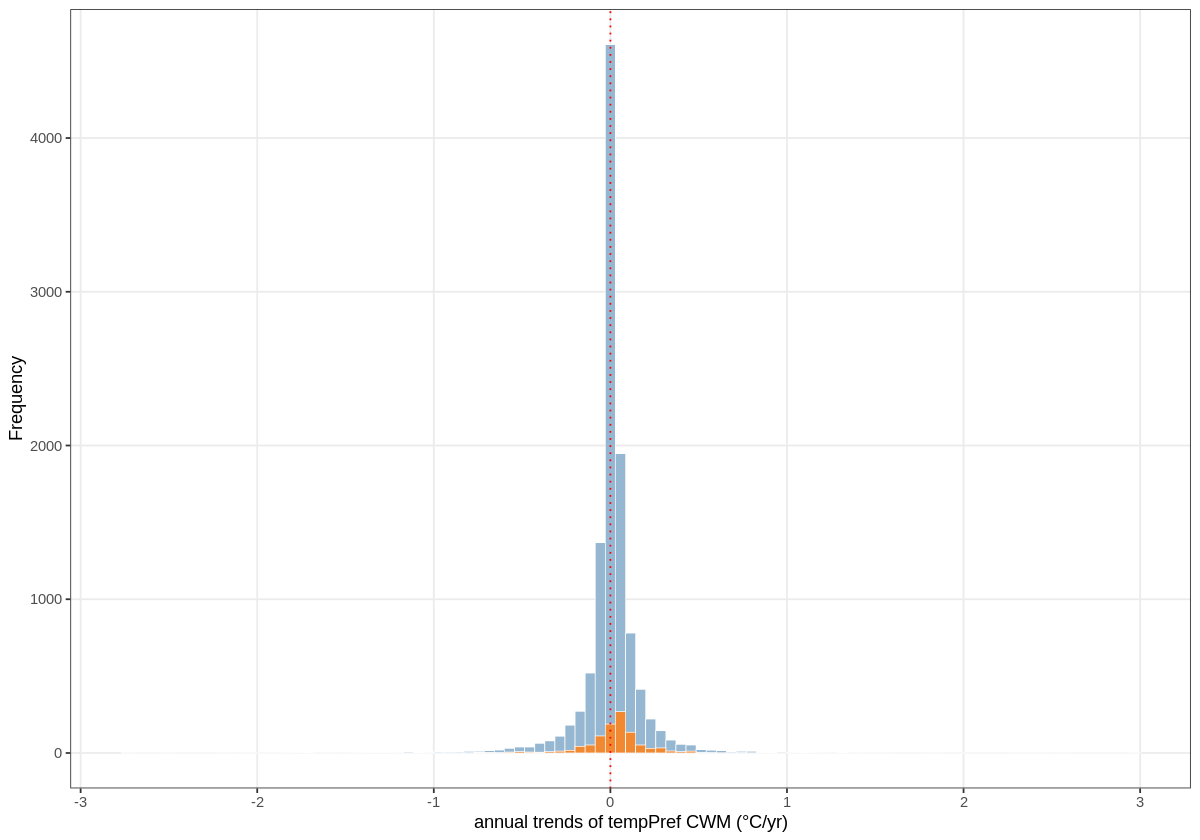

In [94]:
# axis_border <- 3
total_tempPref_fit <- read_csv('tempPref_fit.csv')
total_tempPref_fit_significant <- filter(total_tempPref_fit, term != '(Intercept)',
                                         # abs(estimate) < axis_border,  # delete one Outlier value  which > 3
                                          p.value < 0.05
                                        )

total_tempPref_fit <- filter(total_tempPref_fit, term != '(Intercept)',
                                         # abs(estimate) < axis_border,  # delete one Outlier value  which > 3
                                          # p.value < 0.05
                                        )
nrow(filter(total_tempPref_fit_significant, estimate > 0))/nrow(total_tempPref_fit)
nrow(filter(total_tempPref_fit_significant, estimate < 0))/nrow(total_tempPref_fit)

nrow(filter(total_tempPref_fit, estimate > 0))/nrow(total_tempPref_fit)
nrow(filter(total_tempPref_fit, estimate < 0))/nrow(total_tempPref_fit)

dlookr::diagnose_numeric(total_tempPref_fit)
options(repr.plot.width = 10, repr.plot.height = 7)
hist_tempPref <- ggplot() + 
    geom_histogram(aes(x = total_tempPref_fit$estimate), bins = 101, fill = '#96B7D1', color = 'white', size = 0.2) +
    geom_histogram(aes(x = total_tempPref_fit_significant$estimate), bins = 101, fill = '#F18932', color = 'white', size = 0.2) + 
    geom_vline(xintercept = 0, linetype = "dotted", 
                color = "red", size = 0.5) + 
    xlab('annual trends of tempPref CWM (\u00B0C/yr)') + ylab('Frequency') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
hist_tempPref
# ggsave('../output/histogram_tempPref.pdf', width = 4, height = 3, units = 'cm', scale = 6)
saveRDS(hist_tempPref, '../output/hist_tempPref.rds')

In [95]:
outlier_low <- -0.3
outlier_high <- 0.3
point_map_tempPref <- left_join(total_tempPref_fit_significant, grid_point_xy, by = c('grid' = 'seqnum')) %>%
    mutate(type = case_when(estimate > 0 ~ 'warming',
                            estimate < 0 ~ 'cooling'),
          estimate.cut = case_when(estimate < outlier_low ~ outlier_low, 
                                   outlier_low <= estimate & estimate <= outlier_high ~ estimate, 
                                   estimate > outlier_high ~ outlier_high))


Attaching package: ‘colorspace’


The following object is masked from ‘package:terra’:

    RGB


Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”


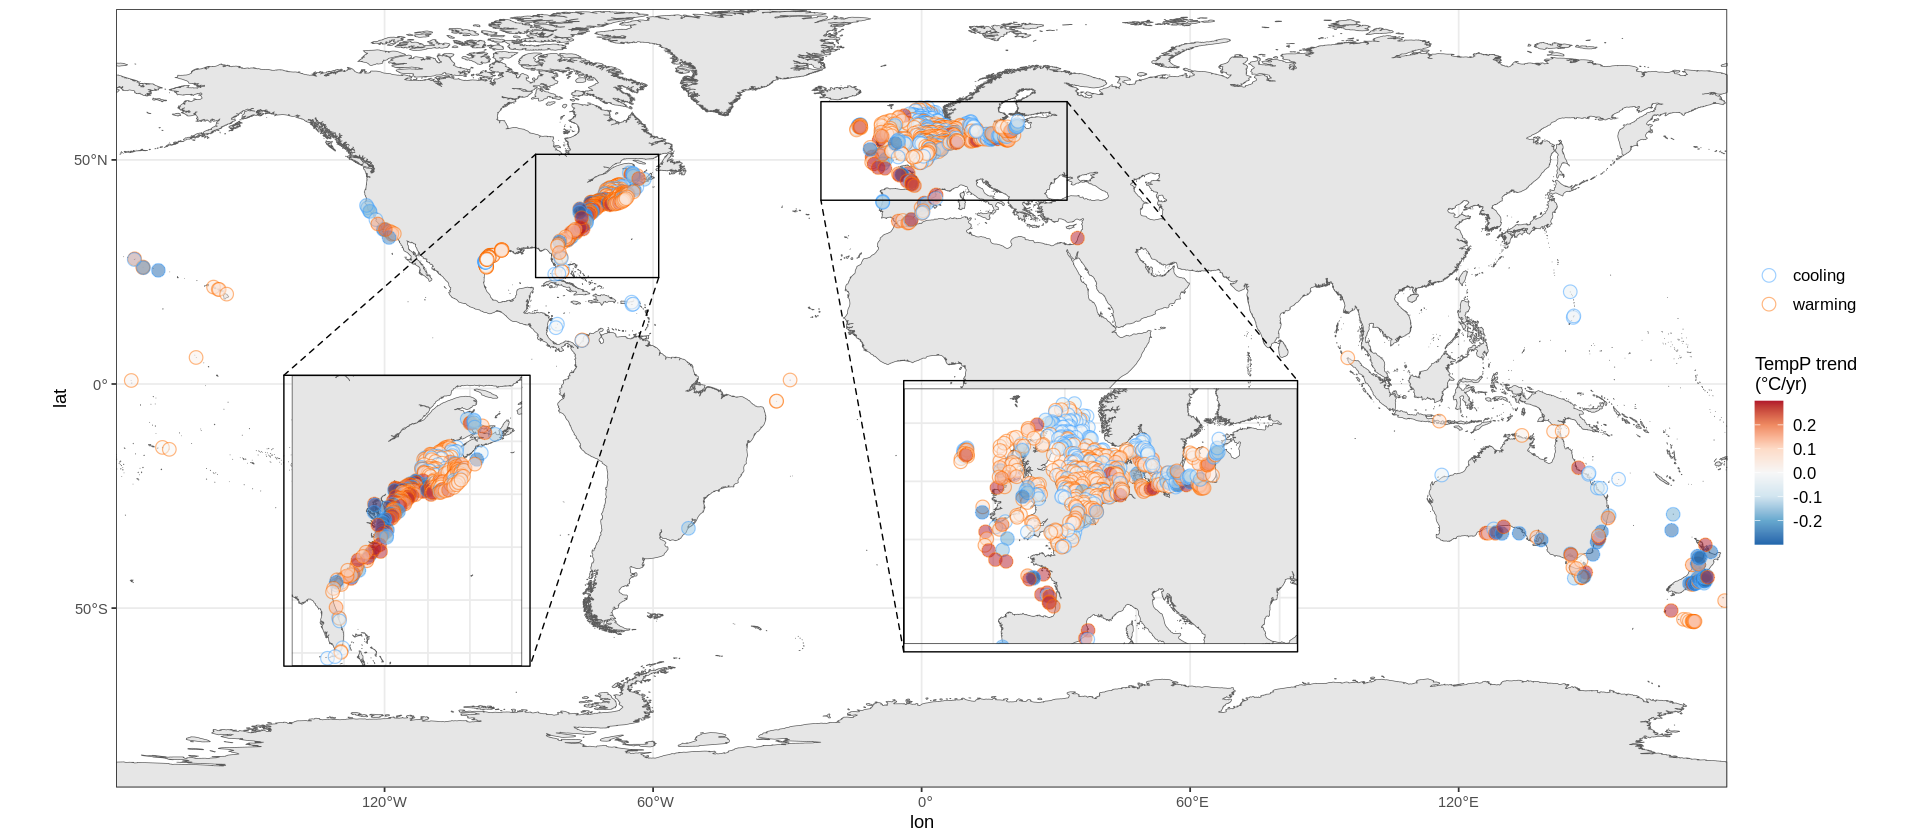

In [96]:
library(colorspace)
options(repr.plot.width = 16, repr.plot.height = 7)
p_significant_change_tempPref <- ggplot() +
    geom_sf(data = ocean_map, aes(geometry = geometry), fill = '#e6e6e6') + 
    geom_point(data = point_map_tempPref, shape = 21,
    #         aes(geometry = geometry, color = type), alpha = 0.5) +
    # scale_color_manual(breaks = c('cooling', 'warming'), values = c('#3FA0FF', '#FF6E00')) +
            aes(x = lon, y = lat, fill = estimate.cut, color = type), size = 3.5, alpha = 0.5) +
    scale_fill_distiller(palette = 'RdBu', limits = c(outlier_low, outlier_high)) +
    scale_color_manual(breaks = c('cooling', 'warming'), values = c('#3FA0FF', '#FF6E00')) + 
    theme_bw() + 
    theme(legend.text = element_text(size = 10)) +
    labs(fill = 'TempP trend\n(\u00B0C/yr)') +
    guides(color = guide_legend(title = NULL, order = 1), fill = guide_colorbar(order = 0)) +
    coord_sf(expand = FALSE) + 
    geom_magnify(data = point_map_tempPref, from = c(-85, -60, 25, 50), to = c(-140, -90, -60, -1), shape = "outline") +
    geom_magnify(data = point_map_tempPref, from = c(-20, 30, 42, 62), to = c(0, 80, -57, -2), shape = "outline")
p_significant_change_tempPref
saveRDS(p_significant_change_tempPref, '../output/p_significant_change_tempPref.rds')
# ggsave('../output/p_significant_change_tempPref.pdf', p_significant_change_tempPref, width = 11, height = 5, units = 'cm', scale = 3)

# maxLengthTL

In [97]:
obis_maxlengthTL_table <- group_by(obis_traits_imputed, dataset_name, grid, date_year) %>%
    filter(!is.na(MaxLengthTL), !is.na(abundance)) %>% 
    mutate(ABUNDANCE_percent = abundance / sum(abundance), MaxLengthTL_weighted = MaxLengthTL * ABUNDANCE_percent) %>% 
    summarise(MaxLengthTL_weighted_mean = sum(MaxLengthTL_weighted, na.rm = T))

biotime_maxlengthTL_table <- group_by(biotime_traits_imputed, STUDY_ID, grid, YEAR) %>%
    filter(!is.na(MaxLengthTL), !str_detect(GENUS_SPECIES, '\\(eggs\\)')) %>% 
    mutate(ABUNDANCE_percent = ABUNDANCE / sum(ABUNDANCE), MaxLengthTL_weighted = MaxLengthTL * ABUNDANCE_percent) %>% 
    summarise(MaxLengthTL_weighted_mean = sum(MaxLengthTL_weighted, na.rm = T))

rls_maxlengthTL_table <- group_by(rls_traits_imputed, grid, year) %>%
    filter(!is.na(MaxLengthTL)) %>% 
    mutate(ABUNDANCE_percent = total / sum(total), MaxLengthTL_weighted = MaxLengthTL * ABUNDANCE_percent) %>% 
    summarise(MaxLengthTL_weighted_mean = sum(MaxLengthTL_weighted, na.rm = T))

`summarise()` has grouped output by 'dataset_name', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'grid'. You can override using the `.groups` argument.


In [98]:
obis_maxlengthTL_fit_table <- group_by(obis_maxlengthTL_table, dataset_name, grid) %>%
    group_modify(~ broom::tidy(lm(MaxLengthTL_weighted_mean ~ date_year, data = .x, na.action = na.exclude)))
obis_maxlengthTL_grid_year <- group_by(obis_maxlengthTL_table, dataset_name, grid) %>%
    summarise(max_year = max(date_year), min_year = min(date_year))
obis_maxlengthTL_fit_table <- left_join(obis_maxlengthTL_fit_table, obis_maxlengthTL_grid_year, by = c('dataset_name', 'grid'))

biotime_maxlengthTL_fit_table <- group_by(biotime_maxlengthTL_table, STUDY_ID, grid) %>%
    group_modify(~ broom::tidy(lm(MaxLengthTL_weighted_mean ~ YEAR, data = .x, na.action = na.exclude))) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_maxlengthTL_grid_year <- group_by(biotime_maxlengthTL_table, STUDY_ID, grid) %>%
    summarise(max_year = max(YEAR), min_year = min(YEAR)) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_maxlengthTL_fit_table <- left_join(biotime_maxlengthTL_fit_table, biotime_maxlengthTL_grid_year, by = c('dataset_name', 'grid'))

rls_maxlengthTL_fit_table <- group_by(rls_maxlengthTL_table, grid) %>%
    group_modify(~ broom::tidy(lm(MaxLengthTL_weighted_mean ~ year, data = .x, na.action = na.exclude))) %>% 
    ungroup %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_maxlengthTL_grid_year <- group_by(rls_maxlengthTL_table, grid) %>%
    summarise(max_year = max(year), min_year = min(year)) %>% 
    ungroup %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_maxlengthTL_fit_table <- left_join(rls_maxlengthTL_fit_table, rls_maxlengthTL_grid_year, by = c('dataset_name', 'grid'))

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
`summarise()` has grouped output by 'dataset_name'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID'. You can override using the `.groups` argument.


In [99]:
total_maxlengthTL_fit <- bind_rows(biotime_maxlengthTL_fit_table, obis_maxlengthTL_fit_table, rls_maxlengthTL_fit_table) %>% 
    mutate(dataset_grid = paste(dataset_name, grid, sep = '+')) %>% 
    filter(max_year - min_year > 4)
head(total_maxlengthTL_fit)
write.csv(total_maxlengthTL_fit, 'maxLengthTL_fit.csv', row.names = F)

grid    term        estimate      std.error    statistic  p.value   
1 5269674 (Intercept)  -559.0793200  304.8226467 -1.8341135 0.10928429
2 5269674 YEAR            0.2887331    0.1515859  1.9047492 0.09851553
3  514669 (Intercept)   265.8145451 1011.5954888  0.2627676 0.81732181
4  514669 YEAR           -0.1146517    0.5114232 -0.2241816 0.84343461
5  516130 (Intercept) 23160.3051554          NaN        NaN        NaN
6  516130 YEAR          -11.6886420          NaN        NaN        NaN
  dataset_name       max_year min_year dataset_grid             
1 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
2 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
3 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
4 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
5 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130
6 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130

## plot

variables min           Q1            mean          median       
1 grid       1.000000e+00  5.022770e+05  1.247145e+06  5.562045e+05
2 estimate  -4.224945e+01 -8.098130e-01 -5.066632e-02 -1.291643e-01
3 std.error  1.302353e-16  3.490746e-01  1.285641e+00  5.907895e-01
4 statistic -3.543549e+02 -1.213870e+00 -2.780163e-01 -2.078380e-01
5 p.value    2.790062e-08  1.427025e-01  4.176657e-01  3.815685e-01
6 max_year   1.970000e+03  1.999000e+03  2.003196e+03  2.007000e+03
7 min_year   1.963000e+03  1.971000e+03  1.983176e+03  1.980000e+03
  Q3           max          zero minus outlier
1 1.073076e+06 5.269674e+06 0       0  1899   
2 5.569153e-01 3.416110e+01 0    6283  1578   
3 1.347382e+00 4.443296e+01 0       0  1075   
4 7.662844e-01 7.014092e+02 0    5616   611   
5 6.705320e-01 9.998906e-01 0       0     0   
6 2.010000e+03 2.021000e+03 0       0  1006   
7 1.995000e+03 2.015000e+03 0       0     0

[1] 0.04310345

[1] 0.0673658

[1] 0.4416104

[1] 0.5583896

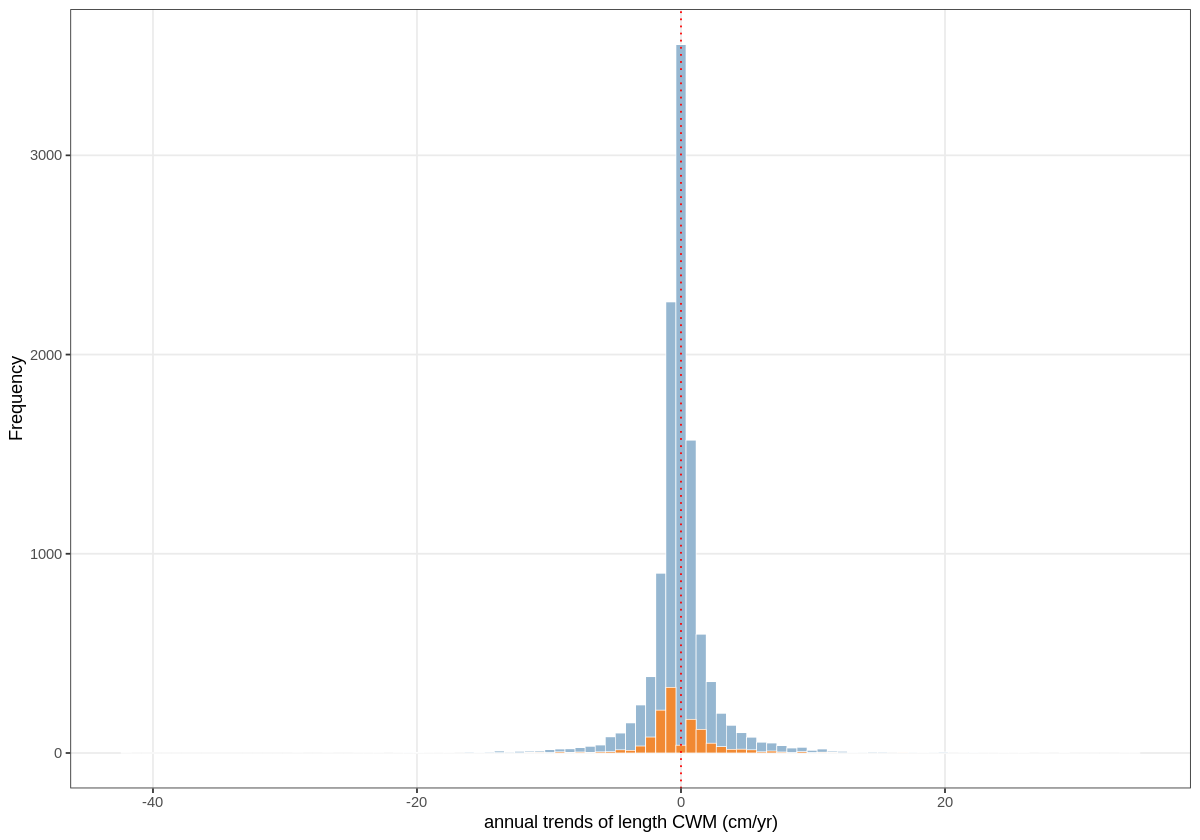

In [100]:
total_maxlengthTL_fit_significant <- filter(total_maxlengthTL_fit, term != '(Intercept)',
                                            p.value < 0.05)
total_maxlengthTL_fit <- filter(total_maxlengthTL_fit, term != '(Intercept)')
dlookr::diagnose_numeric(total_maxlengthTL_fit)

nrow(filter(total_maxlengthTL_fit_significant, estimate > 0))/nrow(total_maxlengthTL_fit)
nrow(filter(total_maxlengthTL_fit_significant, estimate < 0))/nrow(total_maxlengthTL_fit)

nrow(filter(total_maxlengthTL_fit, estimate > 0))/nrow(total_maxlengthTL_fit)
nrow(filter(total_maxlengthTL_fit, estimate < 0))/nrow(total_maxlengthTL_fit)

options(repr.plot.width = 10, repr.plot.height = 7)
hist_maxlengthTL <- ggplot() + 
    geom_histogram(aes(x = total_maxlengthTL_fit$estimate), bins = 101, fill = '#96B7D1', color = 'white', size = 0.2) +
    geom_histogram(aes(x = total_maxlengthTL_fit_significant$estimate), bins = 101, fill = '#F18932', color = 'white', size = 0.2) + 
    geom_vline(xintercept = 0, linetype = "dotted", 
                color = "red", size = 0.5) + 
    xlab('annual trends of length CWM (cm/yr)') + ylab('Frequency') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
hist_maxlengthTL
# ggsave('../output/histogram_maxlengthTL.pdf', width = 4, height = 3, units = 'cm', scale = 6)
saveRDS(hist_maxlengthTL, '../output/hist_maxlengthTL.rds')

In [101]:
outlier_low <- -7
outlier_high <- 7
point_map_maxlengthTL <- left_join(total_maxlengthTL_fit_significant, grid_point_xy, by = c('grid' = 'seqnum')) %>%
    mutate(type = case_when(estimate > 0 ~ 'bigger',
                            estimate < 0 ~ 'smaller'),
           estimate.cut = case_when(estimate < outlier_low ~ outlier_low, 
                                   outlier_low <= estimate & estimate <= outlier_high ~ estimate, 
                                   estimate > outlier_high ~ outlier_high))

Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”


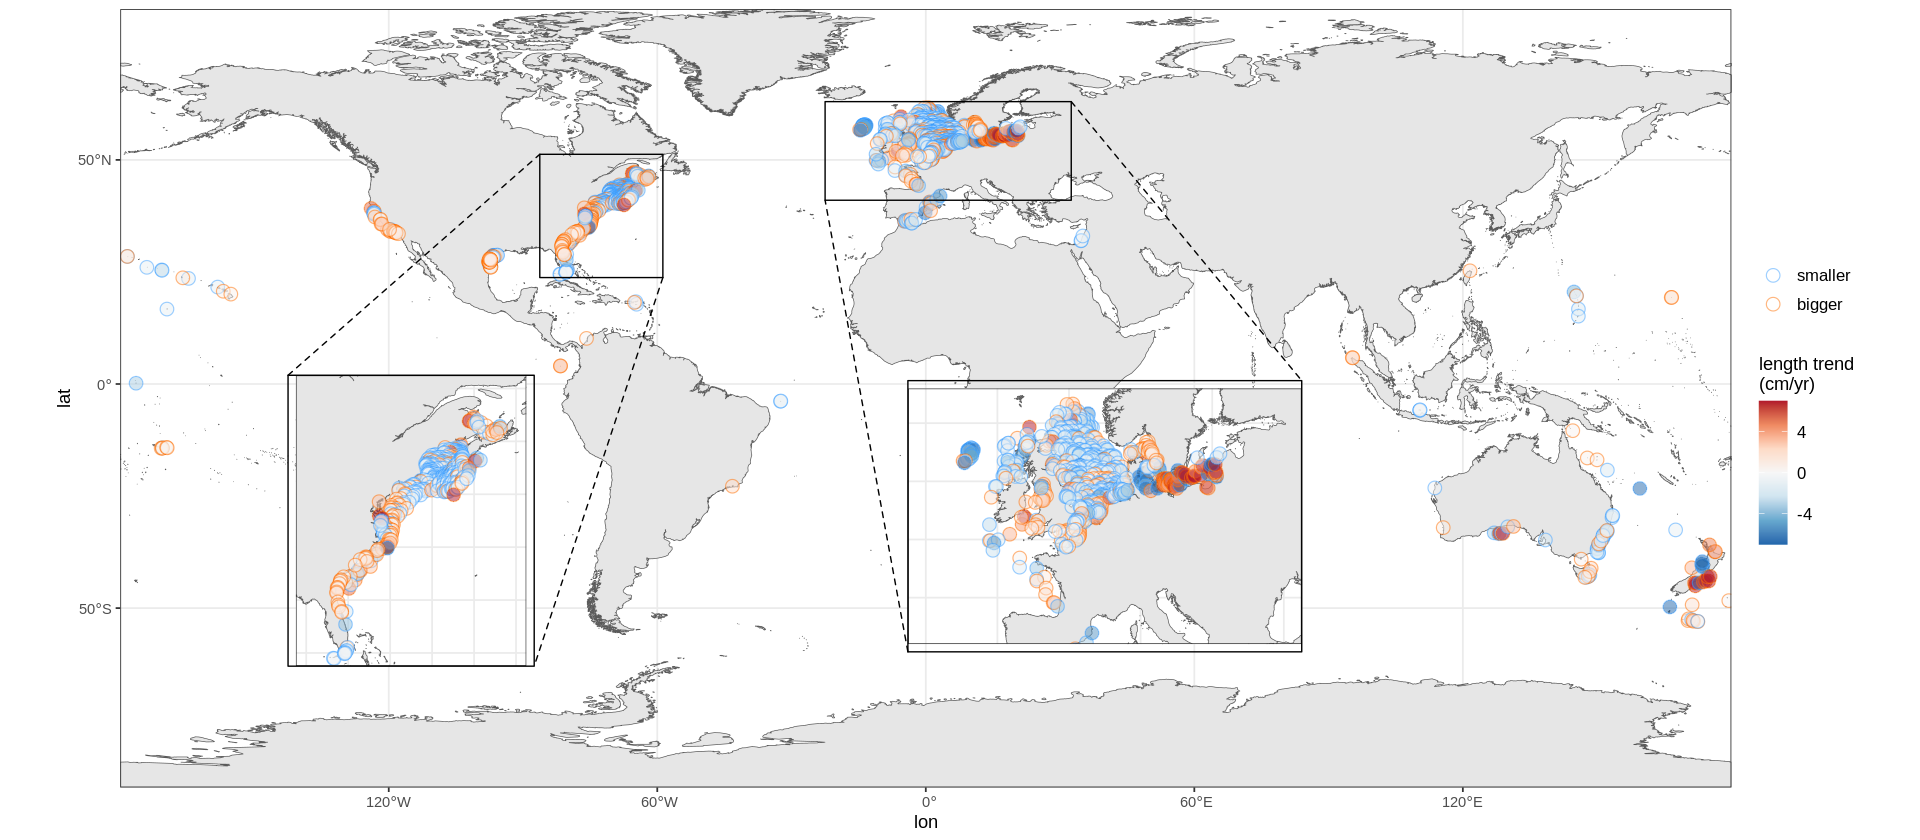

In [102]:
sf_use_s2(FALSE)
options(repr.plot.width = 16, repr.plot.height = 7)
p_significant_change_maxlengthTL <- ggplot() +
    geom_sf(data = ocean_map, aes(geometry = geometry), fill = '#e6e6e6') + 
    geom_point(data = point_map_maxlengthTL, shape = 21,
    #         aes(geometry = geometry, color = type), alpha = 0.5) +
            aes(x = lon, y = lat, fill = estimate.cut, color = type), size = 3.5, alpha = 0.5) +
    scale_fill_distiller(palette = 'RdBu', limits = c(outlier_low, outlier_high)) +
    scale_color_manual(breaks = c('smaller', 'bigger'), values = c('#3FA0FF', '#FF6E00')) +
    theme_bw() +
    theme(legend.text = element_text(size = 10)) +
    labs(fill = 'length trend\n(cm/yr)') +
    guides(color = guide_legend(title = NULL, order = 1), fill = guide_colorbar(order = 0)) +
    coord_sf(expand = FALSE) + 
    geom_magnify(data = point_map_maxlengthTL, from = c(-85, -60, 25, 50), to = c(-140, -90, -60, -1), shape = "outline") +
    geom_magnify(data = point_map_maxlengthTL, from = c(-20, 30, 42, 62), to = c(0, 80, -57, -2), shape = "outline")
p_significant_change_maxlengthTL
saveRDS(p_significant_change_maxlengthTL, '../output/p_significant_change_maxlengthTL.rds')
# ggsave('../output/p_significant_change_maxlengthTL.pdf', p_significant_change_maxlengthTL, width = 11, height = 5, units = 'cm', scale = 3)

# Troph level

In [103]:
obis_Troph_table <- group_by(obis_traits_imputed, dataset_name, grid, date_year) %>%
    filter(!is.na(Troph), !is.na(abundance)) %>% 
    mutate(ABUNDANCE_percent = abundance / sum(abundance), Troph_weighted = Troph * ABUNDANCE_percent) %>% 
    summarise(Troph_weighted_mean = sum(Troph_weighted, na.rm = T))

biotime_Troph_table <- group_by(biotime_traits_imputed, STUDY_ID, grid, YEAR) %>%
    filter(!is.na(Troph), !str_detect(GENUS_SPECIES, '\\(eggs\\)')) %>% 
    mutate(ABUNDANCE_percent = ABUNDANCE / sum(ABUNDANCE), Troph_weighted = Troph * ABUNDANCE_percent) %>% 
    summarise(Troph_weighted_mean = sum(Troph_weighted, na.rm = T))

rls_Troph_table <- group_by(rls_traits_imputed, grid, year) %>%
    filter(!is.na(Troph)) %>% 
    mutate(ABUNDANCE_percent = total / sum(total), Troph_weighted = Troph * ABUNDANCE_percent) %>% 
    summarise(Troph_weighted_mean = sum(Troph_weighted, na.rm = T))

`summarise()` has grouped output by 'dataset_name', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID', 'grid'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'grid'. You can override using the `.groups` argument.


In [104]:
obis_Troph_fit_table <- group_by(obis_Troph_table, dataset_name, grid) %>%
    group_modify(~ broom::tidy(lm(Troph_weighted_mean ~ date_year, data = .x, na.action = na.exclude)))
obis_Troph_grid_year <- group_by(obis_Troph_table, dataset_name, grid) %>%
    summarise(max_year = max(date_year), min_year = min(date_year))
obis_Troph_fit_table <- left_join(obis_Troph_fit_table, obis_Troph_grid_year, by = c('dataset_name', 'grid'))

biotime_Troph_fit_table <- group_by(biotime_Troph_table, STUDY_ID, grid) %>%
    group_modify(~ broom::tidy(lm(Troph_weighted_mean ~ YEAR, data = .x, na.action = na.exclude))) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_Troph_grid_year <- group_by(biotime_Troph_table, STUDY_ID, grid) %>%
    summarise(max_year = max(YEAR), min_year = min(YEAR)) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID)
biotime_Troph_fit_table <- left_join(biotime_Troph_fit_table, biotime_Troph_grid_year, by = c('dataset_name', 'grid'))

rls_Troph_fit_table <- group_by(rls_Troph_table, grid) %>%
    group_modify(~ broom::tidy(lm(Troph_weighted_mean ~ year, data = .x, na.action = na.exclude))) %>% 
    ungroup() %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_Troph_grid_year <- group_by(rls_Troph_table, grid) %>%
    summarise(max_year = max(year), min_year = min(year)) %>% 
    ungroup() %>% 
    mutate(dataset_name = rep('rls', nrow(.)))
rls_Troph_fit_table <- left_join(rls_Troph_fit_table, rls_Troph_grid_year, by = c('dataset_name', 'grid'))

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
`summarise()` has grouped output by 'dataset_name'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID'. You can override using the `.groups` argument.


In [105]:
total_Troph_fit <- bind_rows(biotime_Troph_fit_table, obis_Troph_fit_table, rls_Troph_fit_table) %>% 
    mutate(dataset_grid = paste(dataset_name, grid, sep = '+')) %>% 
    filter(max_year - min_year > 4)
head(total_Troph_fit)
write.csv(total_Troph_fit, 'Troph_fit.csv', row.names = F)

grid    term        estimate      std.error    statistic   p.value  
1 5269674 (Intercept)  2.820005e+00 4.571781e+00  0.61682845 0.5568695
2 5269674 YEAR         4.272714e-05 2.273511e-03  0.01879346 0.9855303
3  514669 (Intercept) -2.187072e+01 3.394076e+02 -0.06443792 0.9544827
4  514669 YEAR         1.268501e-02 1.715912e-01  0.07392578 0.9477979
5  516130 (Intercept)  2.892890e+02          NaN         NaN       NaN
6  516130 YEAR        -1.444938e-01          NaN         NaN       NaN
  dataset_name       max_year min_year dataset_grid             
1 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
2 biotimeStudyId_45  2015     2006     biotimeStudyId_45+5269674
3 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
4 biotimeStudyId_126 1980     1975     biotimeStudyId_126+514669
5 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130
6 biotimeStudyId_126 1979     1974     biotimeStudyId_126+516130

## plot

variables min           Q1            mean          median       
1 grid       1.000000e+00  5.022770e+05  1.247145e+06  5.562045e+05
2 estimate  -2.321033e-01 -8.865872e-03  4.062551e-04 -3.761550e-04
3 std.error  8.225691e-17  4.736791e-03  1.391980e-02  8.124058e-03
4 statistic -2.415171e+03 -1.003402e+00 -3.034724e-01 -4.745629e-02
5 p.value    6.999115e-06  1.582408e-01  4.347970e-01  4.046726e-01
6 max_year   1.970000e+03  1.999000e+03  2.003196e+03  2.007000e+03
7 min_year   1.963000e+03  1.971000e+03  1.983176e+03  1.980000e+03
  Q3           max          zero minus outlier
1 1.073076e+06 5.269674e+06 0       0  1899   
2 8.383651e-03 2.625531e-01 0    5807  1383   
3 1.617587e-02 2.221693e-01 0       0   896   
4 8.807824e-01 2.708009e+02 0    5169   625   
5 6.952550e-01 9.999237e-01 0       0     0   
6 2.010000e+03 2.021000e+03 0       0  1006   
7 1.995000e+03 2.015000e+03 0       0     0

[1] 0.04550302

[1] 0.0544792

[1] 0.483914

[1] 0.516086

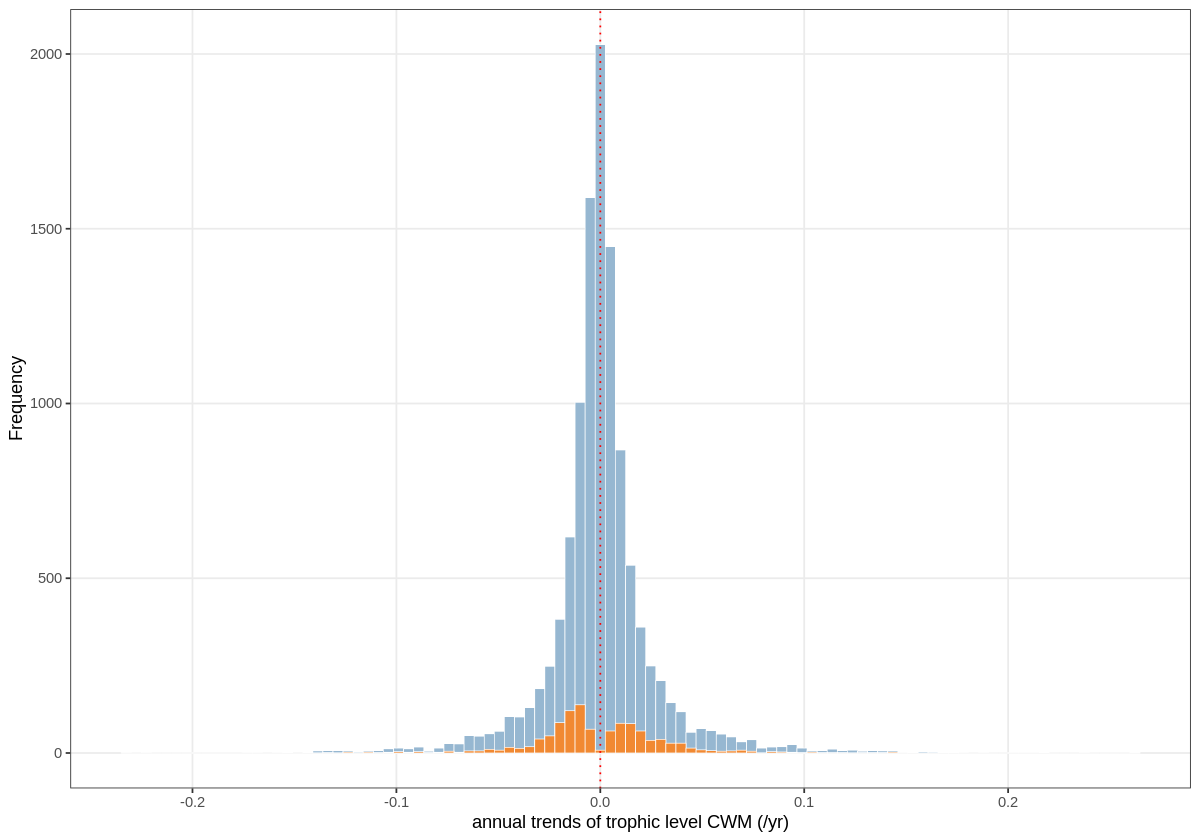

In [106]:
total_Troph_fit_significant <- filter(total_Troph_fit, term != '(Intercept)',
                                            p.value < 0.05)
total_Troph_fit <- filter(total_Troph_fit, term != '(Intercept)')
dlookr::diagnose_numeric(total_Troph_fit)

nrow(filter(total_Troph_fit_significant, estimate > 0))/nrow(total_Troph_fit)
nrow(filter(total_Troph_fit_significant, estimate < 0))/nrow(total_Troph_fit)

nrow(filter(total_Troph_fit, estimate > 0))/nrow(total_Troph_fit)
nrow(filter(total_Troph_fit, estimate < 0))/nrow(total_Troph_fit)

options(repr.plot.width = 10, repr.plot.height = 7)
hist_Troph <- ggplot() + 
    geom_histogram(aes(x = total_Troph_fit$estimate), bins = 101, fill = '#96B7D1', color = 'white', size = 0.2) +
    geom_histogram(aes(x = total_Troph_fit_significant$estimate), bins = 101, fill = '#F18932', color = 'white', size = 0.2) + 
    geom_vline(xintercept = 0, linetype = "dotted", 
                color = "red", size = 0.5) + 
    xlab('annual trends of trophic level CWM (/yr)') + ylab('Frequency') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
hist_Troph
# ggsave('../output/histogram_Troph.pdf', width = 4, height = 3, units = 'cm', scale = 6)
saveRDS(hist_Troph, '../output/hist_Troph.rds')

In [107]:
outlier_low <- -0.08
outlier_high <- 0.08
point_map_Troph <- left_join(total_Troph_fit_significant, grid_point_xy, by = c('grid' = 'seqnum')) %>%
    mutate(type = case_when(estimate > 0 ~ 'higher',
                            estimate < 0 ~ 'lower'),
           estimate.cut = case_when(estimate < outlier_low ~ outlier_low, 
                                   outlier_low <= estimate & estimate <= outlier_high ~ estimate, 
                                   estimate > outlier_high ~ outlier_high))

Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”


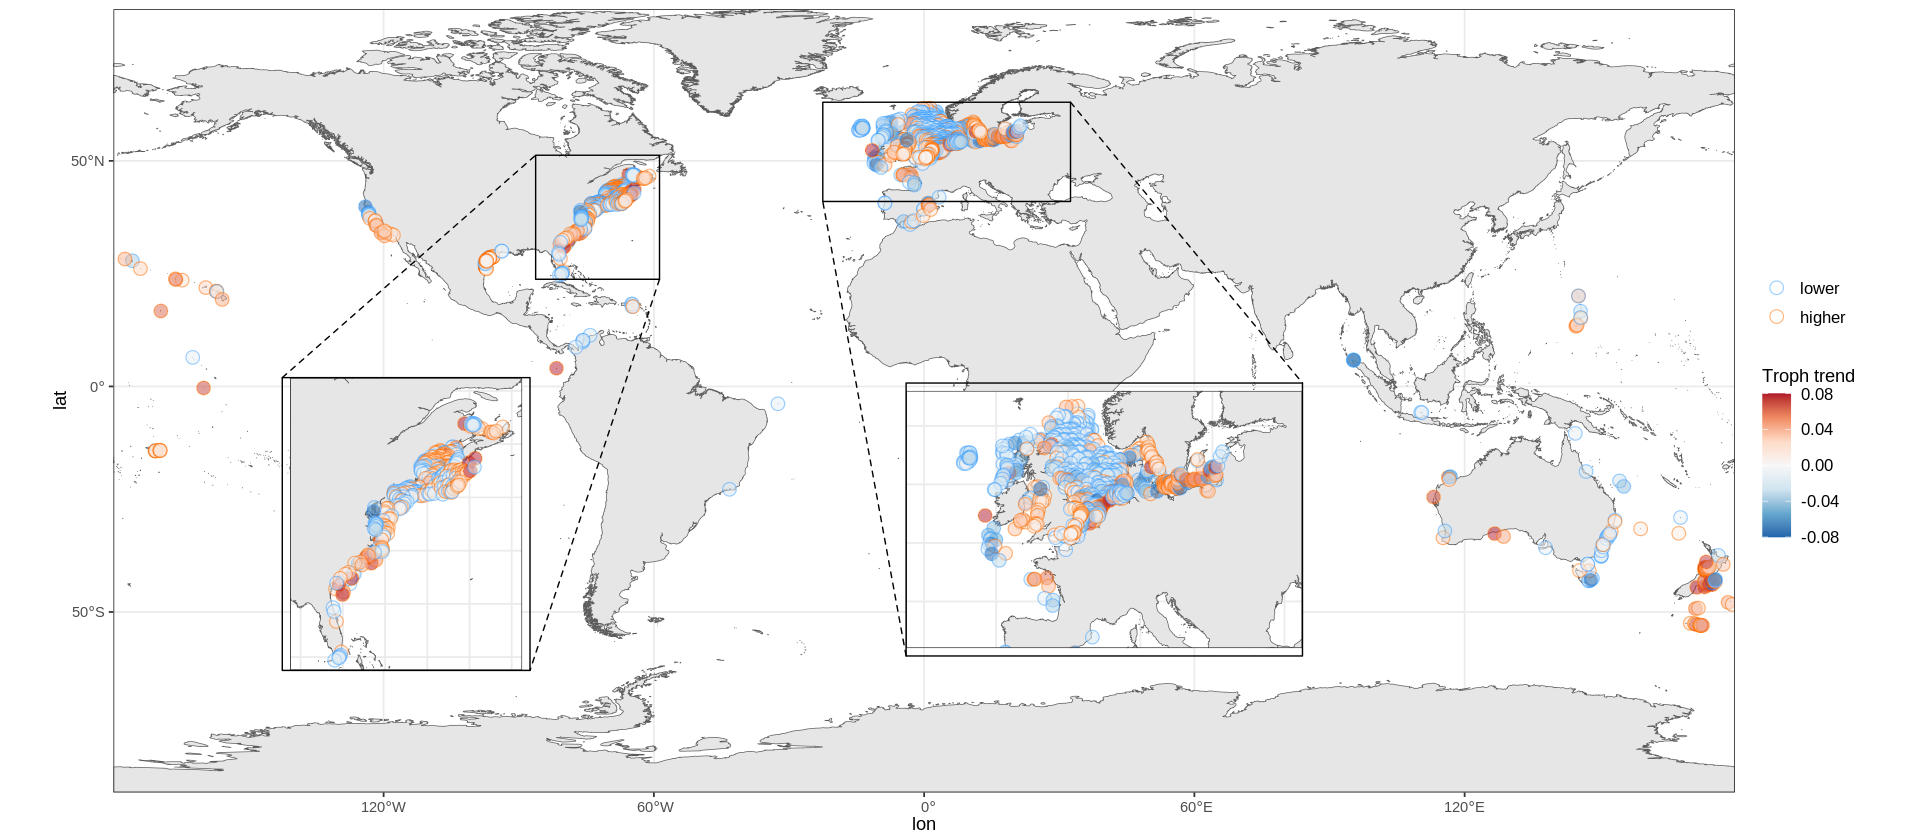

In [108]:
sf_use_s2(FALSE)
options(repr.plot.width = 16, repr.plot.height = 7)
p_significant_change_Troph <- ggplot() +
    geom_sf(data = ocean_map, aes(geometry = geometry), fill = '#e6e6e6') + 
    geom_point(data = point_map_Troph, 
    #         aes(geometry = geometry, color = type), alpha = 0.5) +
            aes(x = lon, y = lat, fill = estimate.cut, color = type), size = 3.5, shape = 21, alpha = 0.5) +
    scale_fill_distiller(palette = 'RdBu', limits = c(outlier_low, outlier_high)) +
    scale_color_manual(breaks = c('lower', 'higher'), values = c('#3FA0FF', '#FF6E00')) +
    theme_bw() +
    theme(legend.text = element_text(size = 10)) +
    labs(fill = 'Troph trend') +
    guides(color = guide_legend(title = NULL, order = 1), fill = guide_colorbar(order = 0)) +
    coord_sf(expand = FALSE) + 
    geom_magnify(data = point_map_Troph, from = c(-85, -60, 25, 50), to = c(-140, -90, -60, -1), shape = "outline") +
    geom_magnify(data = point_map_Troph, from = c(-20, 30, 42, 62), to = c(0, 80, -57, -2), shape = "outline")
p_significant_change_Troph
saveRDS(p_significant_change_Troph, '../output/p_significant_change_Troph.rds')
# ggsave('../output/p_significant_change_Troph.pdf', p_significant_change_Troph, width = 11, height = 5, units = 'cm', scale = 3)

In [109]:
save(list = c('hist_tempPref', 'hist_maxlengthTL', 'hist_Troph'), file = '../output/hist.Rdata')

# size class

## length

In [110]:
bins <- readRDS('../output/maxLengthTL_bins.rds')

In [111]:
breaks <- c(0, attr(bins, 'breaks')[2:11], Inf)
breaks

[1]  0.00000  8.00000 11.50000 15.00000 19.01333 24.40000 30.00000 36.60000
 [9] 45.00000 56.00000 75.00000      Inf

In [112]:
obis_traits_imputed <- mutate(obis_traits_imputed, size_class = cut(MaxLengthTL, breaks = breaks, ordered_result = T))
biotime_traits_imputed <- mutate(biotime_traits_imputed, size_class = cut(MaxLengthTL, breaks = breaks, ordered_result = T))
rls_traits_imputed <- mutate(rls_traits_imputed, size_class = cut(MaxLengthTL, breaks = breaks, ordered_result = T))

In [113]:
obis_size_class_table <- group_by(obis_traits_imputed, dataset_name, grid, date_year) %>%
    filter(!is.na(size_class), !is.na(abundance)) %>% 
    mutate(ABUNDANCE_percent = abundance / sum(abundance)) %>% 
    group_by(dataset_name, grid, date_year, size_class) %>% 
    summarise(size_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T))

biotime_size_class_table <- group_by(biotime_traits_imputed, STUDY_ID, grid, YEAR) %>%
    filter(!is.na(size_class), !str_detect(GENUS_SPECIES, '\\(eggs\\)')) %>% 
    mutate(ABUNDANCE_percent = ABUNDANCE / sum(ABUNDANCE)) %>% 
    group_by(STUDY_ID, grid, YEAR, size_class) %>% 
    summarise(size_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T)) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID) %>% 
    rename(date_year = YEAR)

rls_size_class_table <- group_by(rls_traits_imputed, grid, year) %>%
    filter(!is.na(size_class)) %>% 
    mutate(ABUNDANCE_percent = total / sum(total)) %>% 
    group_by(grid, year, size_class) %>% 
    summarise(size_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T)) %>% 
    ungroup() %>% 
    mutate(dataset_name = rep('rls', nrow(.))) %>% 
    rename(date_year = year)

total_size_class_table <- bind_rows(obis_size_class_table, biotime_size_class_table, rls_size_class_table)

`summarise()` has grouped output by 'dataset_name', 'grid', 'date_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID', 'grid', 'YEAR'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'grid', 'year'. You can override using the `.groups` argument.


In [114]:
summary(total_size_class_table)

 dataset_name            grid           date_year        size_class    
 Length:527219      Min.   :      1   Min.   :1963   (75,Inf] : 93019  
 Class :character   1st Qu.: 478951   1st Qu.:1988   (56,75]  : 84692  
 Mode  :character   Median : 547406   Median :1998   (45,56]  : 82447  
                    Mean   :1076874   Mean   :1996   (36.6,45]: 57586  
                    3rd Qu.:1032103   3rd Qu.:2006   (30,36.6]: 50238  
                    Max.   :5269674   Max.   :2021   (24.4,30]: 43055  
                                                     (Other)  :116182  
 size_class_weighted_abundance
 Min.   :0.0000001            
 1st Qu.:0.0086957            
 Median :0.0579330            
 Mean   :0.1819813            
 3rd Qu.:0.2538872            
 Max.   :1.0000000            
                              

In [115]:
sst_grid <- read_csv('sst_grid.csv')
sst_grid <- gather(sst_grid, key = 'year', value = 'sst_value', -seqnum) %>% setNames(c('grid', 'date_year', 'sst_values'))
sst_grid <- mutate(sst_grid, date_year = as.numeric(gsub('year_', '', date_year)))
head(sst_grid)

Rows: 10027 Columns: 63
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (63): seqnum, year_1960, year_1961, year_1962, year_1963, year_1964, yea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


grid date_year sst_values
1    1 1960      9.463472  
2  729 1960      9.463471  
3 1458 1960      9.463472  
4 1459 1960      9.463471  
5 2185 1960      9.463472  
6 2186 1960      9.463472

In [116]:
total_size_class_table_sst <- left_join(total_size_class_table, sst_grid, by = c('grid', 'date_year'))

In [117]:
write.csv(total_size_class_table_sst, 'size_class_sst_table.csv', row.names = F)

In [118]:
summary(total_size_class_table)

 dataset_name            grid           date_year        size_class    
 Length:527219      Min.   :      1   Min.   :1963   (75,Inf] : 93019  
 Class :character   1st Qu.: 478951   1st Qu.:1988   (56,75]  : 84692  
 Mode  :character   Median : 547406   Median :1998   (45,56]  : 82447  
                    Mean   :1076874   Mean   :1996   (36.6,45]: 57586  
                    3rd Qu.:1032103   3rd Qu.:2006   (30,36.6]: 50238  
                    Max.   :5269674   Max.   :2021   (24.4,30]: 43055  
                                                     (Other)  :116182  
 size_class_weighted_abundance
 Min.   :0.0000001            
 1st Qu.:0.0086957            
 Median :0.0579330            
 Mean   :0.1819813            
 3rd Qu.:0.2538872            
 Max.   :1.0000000            
                              

## trophic levels

In [119]:
bins_troph <- readRDS('../output/Troph_bins.rds')
breaks_troph <- c(0, attr(bins_troph, 'breaks')[2:11], Inf)
breaks_troph

[1] 0.00 2.69 3.07 3.24 3.34 3.40 3.49 3.54 3.64 3.81 4.00  Inf

In [120]:
obis_traits_imputed <- mutate(obis_traits_imputed, troph_class = cut(Troph, breaks = breaks_troph, ordered_result = T))
biotime_traits_imputed <- mutate(biotime_traits_imputed, troph_class = cut(Troph, breaks = breaks_troph, ordered_result = T))
rls_traits_imputed <- mutate(rls_traits_imputed, troph_class = cut(Troph, breaks = breaks_troph, ordered_result = T))

In [121]:
obis_troph_class_table <- group_by(obis_traits_imputed, dataset_name, grid, date_year) %>%
    filter(!is.na(troph_class), !is.na(abundance)) %>% 
    mutate(ABUNDANCE_percent = abundance / sum(abundance)) %>% 
    group_by(dataset_name, grid, date_year, troph_class) %>% 
    summarise(troph_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T))

biotime_troph_class_table <- group_by(biotime_traits_imputed, STUDY_ID, grid, YEAR) %>%
    filter(!is.na(troph_class), !str_detect(GENUS_SPECIES, '\\(eggs\\)')) %>% 
    mutate(ABUNDANCE_percent = ABUNDANCE / sum(ABUNDANCE)) %>% 
    group_by(STUDY_ID, grid, YEAR, troph_class) %>% 
    summarise(troph_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T)) %>% 
    mutate(dataset_name = paste0('biotimeStudyId_', STUDY_ID)) %>%
    ungroup() %>%
    dplyr::select(-STUDY_ID) %>% 
    rename(date_year = YEAR)

rls_troph_class_table <- group_by(rls_traits_imputed, grid, year) %>%
    filter(!is.na(troph_class)) %>% 
    mutate(ABUNDANCE_percent = total / sum(total)) %>% 
    group_by(grid, year, troph_class) %>% 
    summarise(troph_class_weighted_abundance = sum(ABUNDANCE_percent, na.rm = T)) %>% 
    ungroup() %>% 
    mutate(dataset_name = rep('rls', nrow(.))) %>% 
    rename(date_year = year)

total_troph_class_table <- bind_rows(obis_troph_class_table, biotime_troph_class_table, rls_troph_class_table)

`summarise()` has grouped output by 'dataset_name', 'grid', 'date_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'STUDY_ID', 'grid', 'YEAR'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'grid', 'year'. You can override using the `.groups` argument.


In [122]:
summary(total_troph_class_table)
unique(total_troph_class_table$troph_class)

 dataset_name            grid           date_year         troph_class    
 Length:613629      Min.   :      1   Min.   :1963   (4,Inf]    : 88854  
 Class :character   1st Qu.: 484781   1st Qu.:1988   (3.64,3.81]: 79182  
 Mode  :character   Median : 547422   Median :1998   (3.81,4]   : 67943  
                    Mean   :1036523   Mean   :1996   (3.07,3.24]: 66653  
                    3rd Qu.: 655361   3rd Qu.:2006   (3.34,3.4] : 63157  
                    Max.   :5269674   Max.   :2021   (3.54,3.64]: 62022  
                                                     (Other)    :185818  
 troph_class_weighted_abundance
 Min.   :0.00000               
 1st Qu.:0.00596               
 Median :0.04196               
 Mean   :0.15636               
 3rd Qu.:0.19952               
 Max.   :1.00000               
                               

[1] (3.24,3.34] (3.54,3.64] (4,Inf]     (2.69,3.07] (3.34,3.4]  (3.4,3.49] 
 [7] (3.64,3.81] (3.81,4]    (3.49,3.54] (3.07,3.24] (0,2.69]   
11 Levels: (0,2.69] < (2.69,3.07] < (3.07,3.24] < ... < (4,Inf]

In [123]:
total_troph_class_table_sst <- left_join(total_troph_class_table, sst_grid, by = c('grid', 'date_year'))

In [124]:
write.csv(total_troph_class_table_sst, 'troph_class_sst_table.csv', row.names = F)

# fishing effort

In [178]:
fishing_effort_raster <- readRDS('fishing_effort_raster.rds')

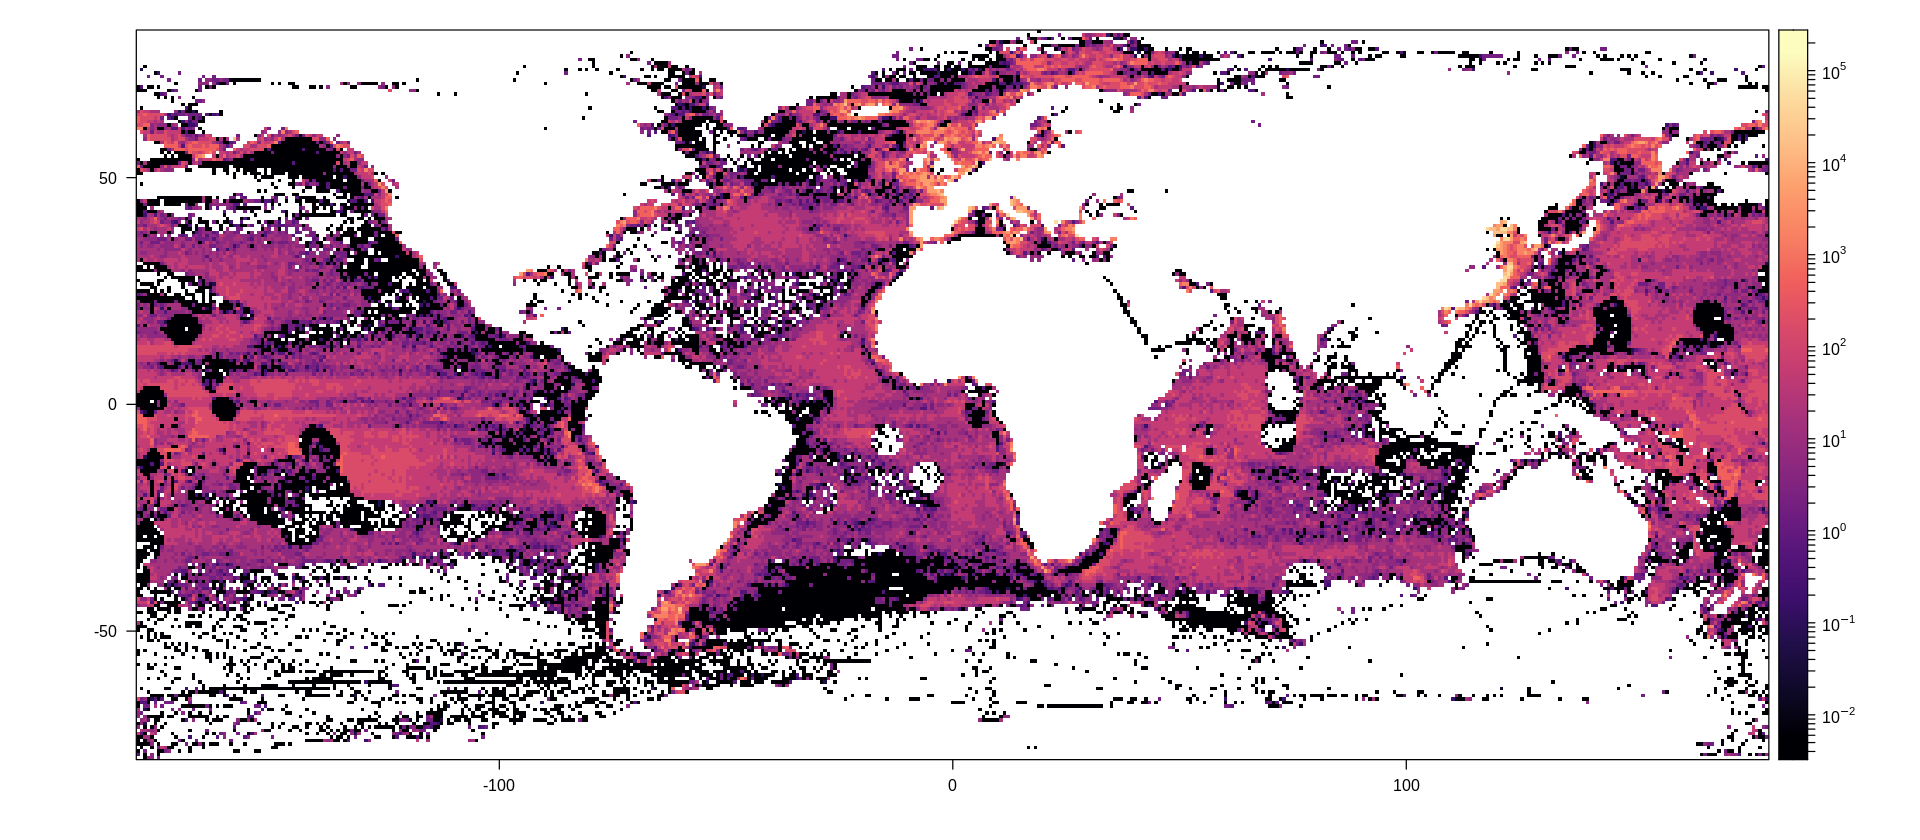

In [179]:
# pdf("../output/fishing_effort.pdf")
print(levelplot(fishing_effort_raster, zscaleLog = T, margin = FALSE))
# dev.off()

# read total fit table with environmental varibales

In [34]:
total_fit <- read_csv('all_fit_env.csv') # results from fit_binding.R
min(abs(grid_point_xy$lat))
max(abs(grid_point_xy$lat))
latitude_cut <- seq(0, 70, 2)
total_fit_xy <- left_join(total_fit, grid_point_xy, by = c('grid' = 'seqnum')) %>% 
    mutate(lat.abs = abs(lat), lat.abs_cut = cut(lat.abs, breaks = latitude_cut, labels = F)*2)

Rows: 19664 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): term.maxLengthTL, dataset_name.maxLengthTL, dataset_grid.maxLength...
dbl (29): grid, estimate.maxLengthTL, std.error.maxLengthTL, statistic.maxLe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 0.1747403

[1] 68.6349

# sst trend plot of grids with significant tempPref fit

In [128]:
sst_trend_tempPref_all <- dplyr::select(total_fit, grid, dataset_name.tempPref, sst_estimate.tempPref, sst_p.value.tempPref)
sst_trend_tempPref <- dplyr::select(total_fit, grid, p.value.tempPref, sst_estimate.tempPref, sst_p.value.tempPref) %>% 
    dplyr::filter(p.value.tempPref < 0.05)

variables             min           Q1            mean         median      
1 grid                   1.000000e+00  5.086480e+05 1.155613e+06 5.554835e+05
2 sst_estimate.tempPref -3.394732e-01 -1.109635e-03 2.354155e-02 2.222990e-02
3 sst_p.value.tempPref   1.127313e-09  1.423850e-02 2.757653e-01 1.499630e-01
  Q3           max          zero minus outlier
1 1.063566e+06 5.269674e+06 0       0  3015   
2 4.835574e-02 3.493223e-01 0    5089  1968   
3 5.023716e-01 9.999675e-01 0       0     0

[1] 0.08340114

[1] 0.02013832

[1] 0.7412022

[1] 0.2587978

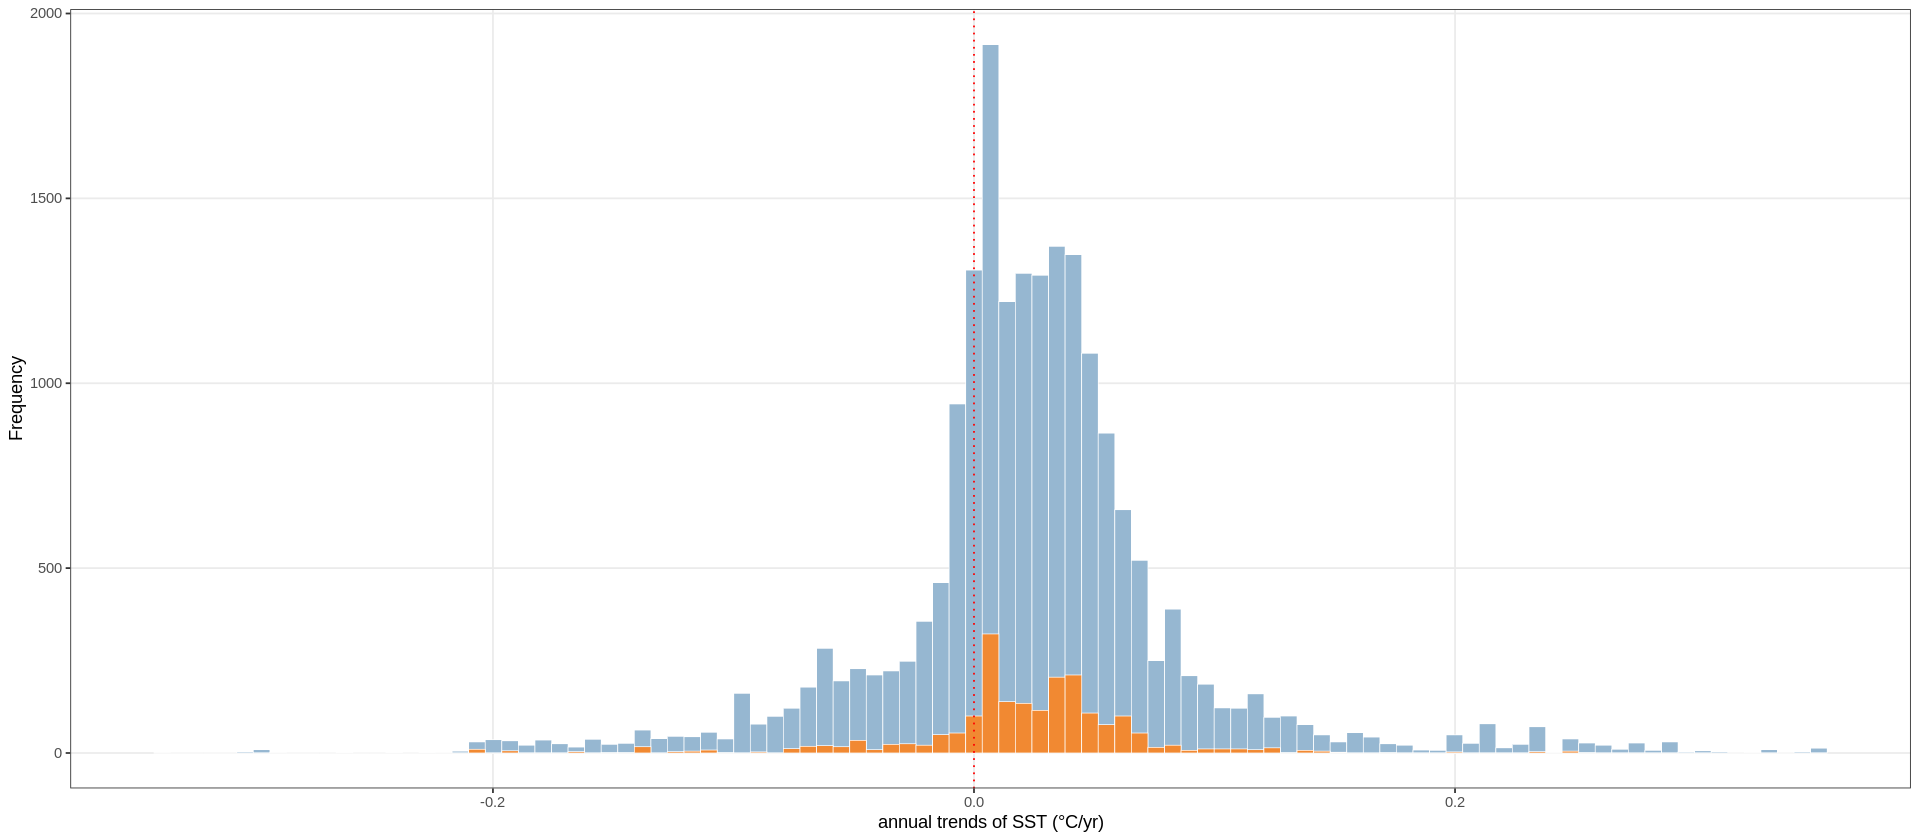

In [129]:
dlookr::diagnose_numeric(sst_trend_tempPref_all)
nrow(filter(sst_trend_tempPref, sst_estimate.tempPref > 0))/nrow(sst_trend_tempPref_all)
nrow(filter(sst_trend_tempPref, sst_estimate.tempPref < 0))/nrow(sst_trend_tempPref_all)

nrow(filter(sst_trend_tempPref_all, sst_estimate.tempPref > 0))/nrow(sst_trend_tempPref_all)
nrow(filter(sst_trend_tempPref_all, sst_estimate.tempPref < 0))/nrow(sst_trend_tempPref_all)

hist_sst <- ggplot() + 
    geom_histogram(aes(x = sst_trend_tempPref_all$sst_estimate.tempPref), bins = 101, fill = '#96B7D1', color = 'white', size = 0.2) +
    geom_histogram(aes(x = sst_trend_tempPref$sst_estimate.tempPref), bins = 101, fill = '#F18932', color = 'white', size = 0.2) + 
    geom_vline(xintercept = 0, linetype = "dotted", 
                color = "red", size = 0.5) + 
    xlab('annual trends of SST (\u00B0C/yr)') + ylab('Frequency') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
hist_sst
saveRDS(hist_sst, '../output/hist_sst.rds')
save(sst_trend_tempPref, sst_trend_tempPref_all, file = '../output/sst_table_for_hist.RData')

In [130]:
sst_point_map <- left_join(sst_trend_tempPref , grid_point_xy, by = c('grid' = 'seqnum')) %>%
    mutate(type = case_when(sst_estimate.tempPref > 0 & p.value.tempPref < 0.05 ~ 'warming',
                            sst_estimate.tempPref < 0 & p.value.tempPref < 0.05 ~ 'cooling',
                            p.value.tempPref > 0.05 ~ 'no change')) %>% 
    rename(esitimate.cut = sst_estimate.tempPref)

Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”


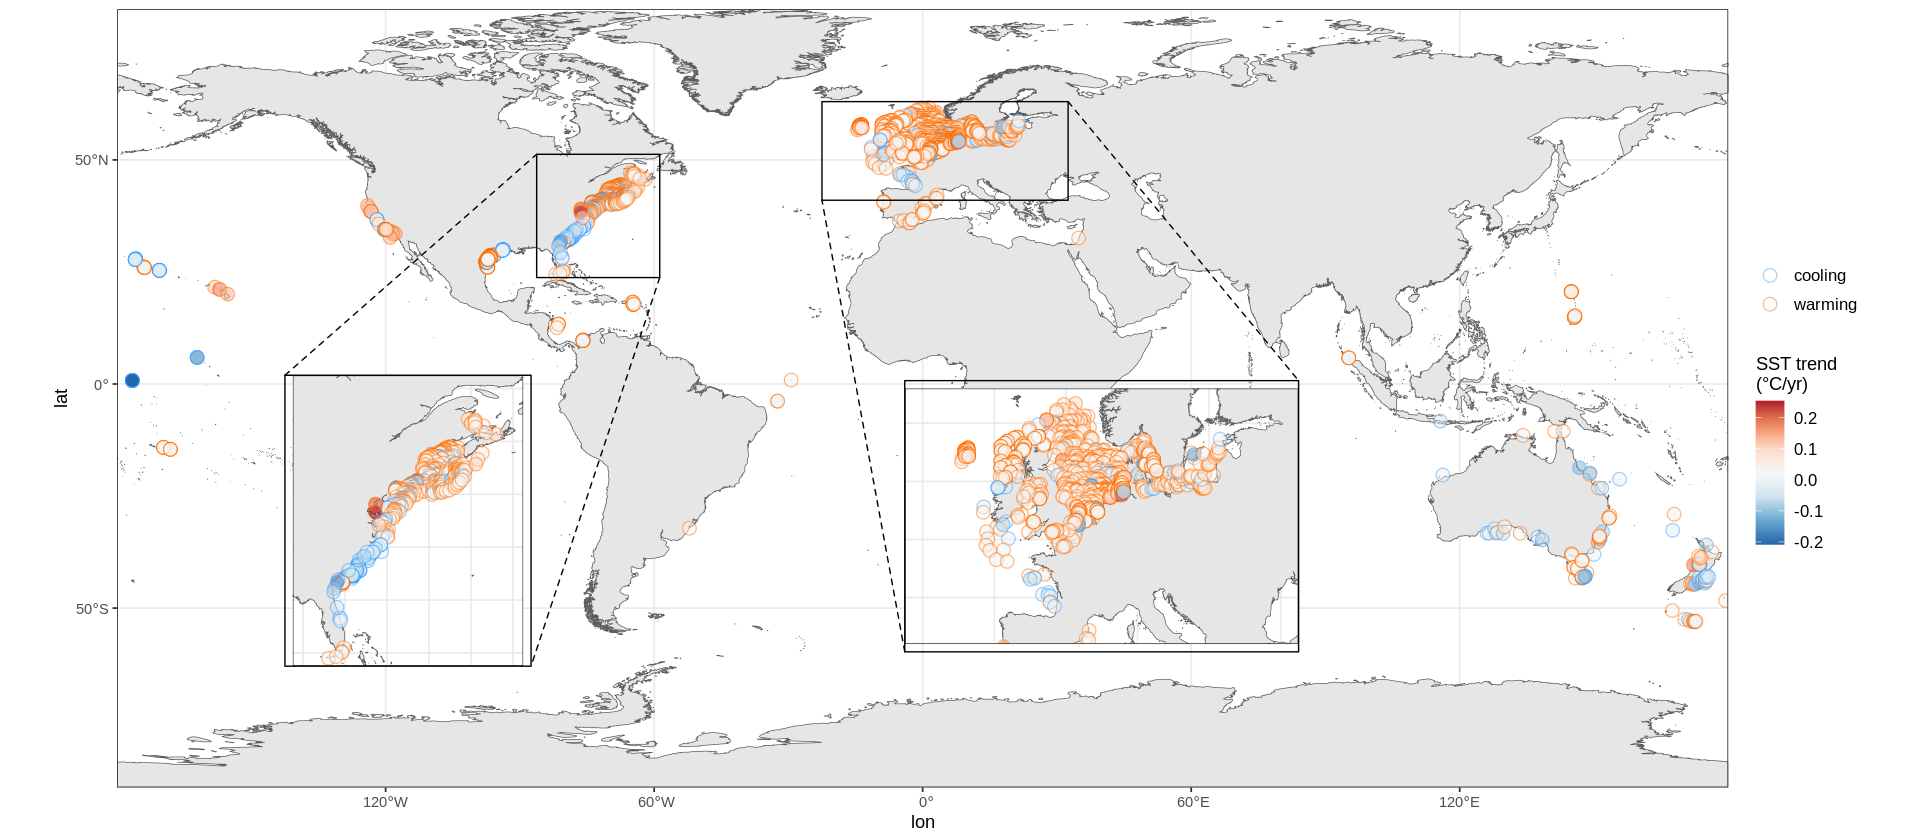

In [131]:
library(ggmagnify)
options(repr.plot.width = 16, repr.plot.height = 7)
sf_use_s2(FALSE)
sst_significant_change <- ggplot() +
    geom_sf(data = ocean_map, aes(geometry = geometry), fill = '#e6e6e6') + 
    geom_point(data = sst_point_map, shape = 21,
            aes(x = lon, y = lat, fill = esitimate.cut, color = type), size = 3.5, alpha = 0.5) +
    scale_fill_distiller(palette = 'RdBu') +
    scale_color_manual(breaks = c('cooling', 'warming', 'no change'), values = c('#3FA0FF', '#FF6E00', '#D9D7DA')) +
    theme_bw() + 
    theme(legend.text = element_text(size = 10)) +
    labs(fill = 'SST trend\n(\u00B0C/yr)') +
    guides(color = guide_legend(title = NULL, order = 1), fill = guide_colorbar(order = 0)) +
    coord_sf(expand = FALSE) + 
    geom_magnify(data = sst_point_map, from = c(-85, -60, 25, 50), to = c(-140, -90, -60, -1), shape = "outline") +
    geom_magnify(data = sst_point_map, from = c(-20, 30, 42, 62), to = c(0, 80, -57, -2), shape = "outline")
sst_significant_change
saveRDS(sst_significant_change, '../output/sst_significant_change.rds')
# ggsave('../output/sst_significant_change_tempPref.pdf', sst_significant_change, width = 11, height = 5, units = 'cm', scale = 3)

# depth pattern

In [ ]:
datasetname_used <- c(total_fit$dataset_name.tempPref, total_fit$dataset_name.Troph, total_fit$dataset_name.maxLengthTL) %>% unique()
write.csv(datasetname_used, '../output/datasetname_used.csv', row.names = F)

In [132]:
library(terra)

In [133]:
# tif_files <- list.files("gebco_2022_geotiff/", ".tif$", full.names = TRUE)
# vrt(tif_files, filename = 'gebco.vrt')
bathymetry <- rast("gebco.vrt")

In [134]:
demersal <- read_csv('datasetname_used_demersal.csv') %>% filter(demersal == 1)

Rows: 81 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): datasetname
dbl (1): demersal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [135]:
demersal_studies <- dplyr::select(total_fit, starts_with('dataset_name'), grid) %>% distinct() %>%
    filter(dataset_name.maxLengthTL %in% demersal$datasetname | dataset_name.tempPref %in% demersal$datasetname |dataset_name.Troph %in% demersal$datasetname )

In [136]:
trawl_grids <- unique(demersal_studies$grid)
trawl_grids_sfpolygon <- filter(grid, seqnum %in% trawl_grids)

In [137]:
library(exactextractr)
trawl_grids_depth = exact_extract(bathymetry, trawl_grids_sfpolygon, fun = 'mean')
trawl_grids_depth_table <- cbind(trawl_grids_depth, trawl_grids_sfpolygon$seqnum) %>% as.data.frame() %>% setNames(c('trawl_grids_depth', 'grid'))

Cannot preload entire working area of 2384709560 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [138]:
trawl_grids_depth_table <- mutate(trawl_grids_depth_table, trawl_grids_depth = ifelse(trawl_grids_depth > -10, -10, trawl_grids_depth))
summary(trawl_grids_depth_table)

 trawl_grids_depth       grid        
 Min.   :-3669.38   Min.   :      1  
 1st Qu.: -130.48   1st Qu.: 477486  
 Median :  -69.80   Median : 549622  
 Mean   : -109.55   Mean   :1014189  
 3rd Qu.:  -38.11   3rd Qu.: 631254  
 Max.   :  -10.00   Max.   :5199994  

In [139]:
demersal_studies_bathymetry <- left_join(demersal_studies, trawl_grids_depth_table, by = c('grid'))
total_fit_bathymetry <- left_join(total_fit, demersal_studies_bathymetry) %>% dplyr::mutate(trawl_grids_depth = replace_na(trawl_grids_depth, -10))

Joining with `by = join_by(grid, dataset_name.maxLengthTL, dataset_name.Troph, dataset_name.tempPref)`


In [140]:
p_depth_tempPref <- ggplot(total_fit_bathymetry, aes(x = estimate.tempPref, y = abs(trawl_grids_depth)+1)) + 
    geom_hex(bins = 50) +
    scale_fill_distiller(palette = "Spectral", direction = -1) +
    labs(fill = 'Number of time series') + 
    xlab('tempPref trend (\u00B0C/yr)') + ylab('Depth (m)') +
    scale_y_log10(
       breaks = scales::trans_breaks("log10", function(x) 10^x),
       labels = scales::trans_format("log10", scales::math_format(10^.x))
     ) + 
    annotation_logticks(sides = "l") +
    theme_bw() +
    theme(legend.position = c(0.8, 0.9), legend.direction = "horizontal", panel.grid.minor = element_blank())

In [141]:
p_depth_Troph <- ggplot(total_fit_bathymetry, aes(x = estimate.Troph, y = abs(trawl_grids_depth)+1)) + 
    geom_hex(bins = 50) +
    scale_fill_distiller(palette = "Spectral", direction = -1) +
    labs(fill = 'Number of time series') +
    xlab('Trophic levels trend (/yr)') + ylab('Depth (m)') +
    scale_y_log10(
       breaks = scales::trans_breaks("log10", function(x) 10^x),
       labels = scales::trans_format("log10", scales::math_format(10^.x))
     ) + 
    annotation_logticks(sides = "l") +
    theme_bw() +
    theme(legend.position = c(0.8, 0.9), legend.direction = "horizontal", panel.grid.minor = element_blank())

In [142]:
p_depth_maxLengthTL <- ggplot(total_fit_bathymetry, aes(x = estimate.maxLengthTL, y = abs(trawl_grids_depth)+1)) + 
    geom_hex(bins = 50) +
    scale_fill_distiller(palette = "Spectral", direction = -1) +
    labs(fill = 'Number of time series') +
    xlab('length trend (cm/yr)') + ylab('Depth (m)') +
    scale_y_log10(
       breaks = scales::trans_breaks("log10", function(x) 10^x),
       labels = scales::trans_format("log10", scales::math_format(10^.x))
     ) + 
    annotation_logticks(sides = "l") +
    theme_bw() +
    theme(legend.position = c(0.8, 0.9), legend.direction = "horizontal", panel.grid.minor = element_blank())

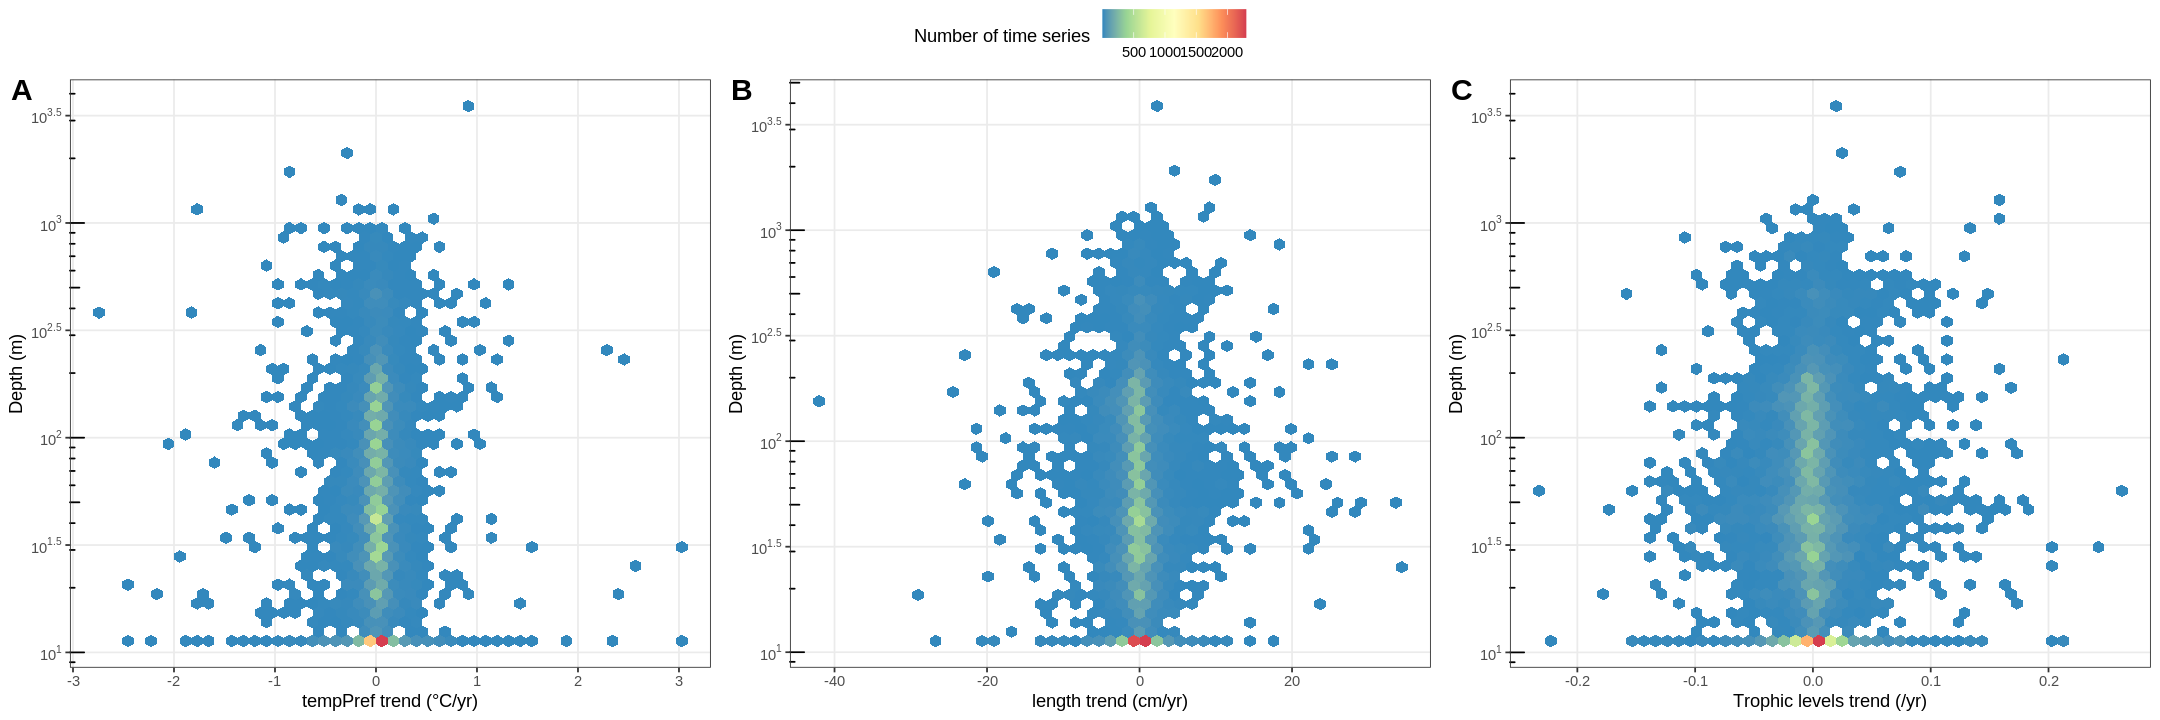

In [143]:
options(repr.plot.width = 18, repr.plot.height = 6)
ggpubr::ggarrange(p_depth_tempPref,
                  p_depth_maxLengthTL,
                  p_depth_Troph,
                  nrow = 1,
                  labels = c("A", "B", "C"),
                  font.label = list(size = 18),
                  common.legend = T)
ggsave('../output/depth_pattern_combination.pdf', width = 18, height = 6, units = 'cm', scale = 3)

# plot combination

In [144]:
nrow(total_fit_xy)

[1] 19664

In [35]:
total_fit_sub_tempPref <- select(total_fit_xy, dataset_name.tempPref, grid, min_year.tempPref, max_year.tempPref, estimate.tempPref, p.value.tempPref, sst_baseline.tempPref, lat.abs, lat.abs_cut) %>% distinct() %>% 
    mutate(duration = max_year.tempPref - min_year.tempPref,
           sig = case_when(estimate.tempPref > 0  ~ 'pos',
                           estimate.tempPref < 0  ~ 'neg'))
nrow(total_fit_sub_tempPref)
total_fit_sub_troph <- select(total_fit_xy, dataset_name.Troph, grid, min_year.Troph, max_year.Troph, estimate.Troph, p.value.Troph, sst_baseline.Troph, lat.abs, lat.abs_cut) %>% distinct() %>% 
    mutate(duration = max_year.Troph - min_year.Troph,
           sig = case_when(estimate.Troph > 0  ~ 'pos',
                           estimate.Troph < 0  ~ 'neg'))
nrow(total_fit_sub_troph)
total_fit_sub_length <- select(total_fit_xy, dataset_name.maxLengthTL, grid, min_year.maxLengthTL, max_year.maxLengthTL, estimate.maxLengthTL, p.value.maxLengthTL, sst_baseline.maxLengthTL, lat.abs, lat.abs_cut) %>% distinct() %>% 
    mutate(duration = max_year.maxLengthTL - min_year.maxLengthTL,
           sig = case_when(estimate.maxLengthTL > 0  ~ 'pos',
                           estimate.maxLengthTL < 0  ~ 'neg'))
nrow(total_fit_sub_length)

[1] 11252

[1] 11252

[1] 11252

## time series

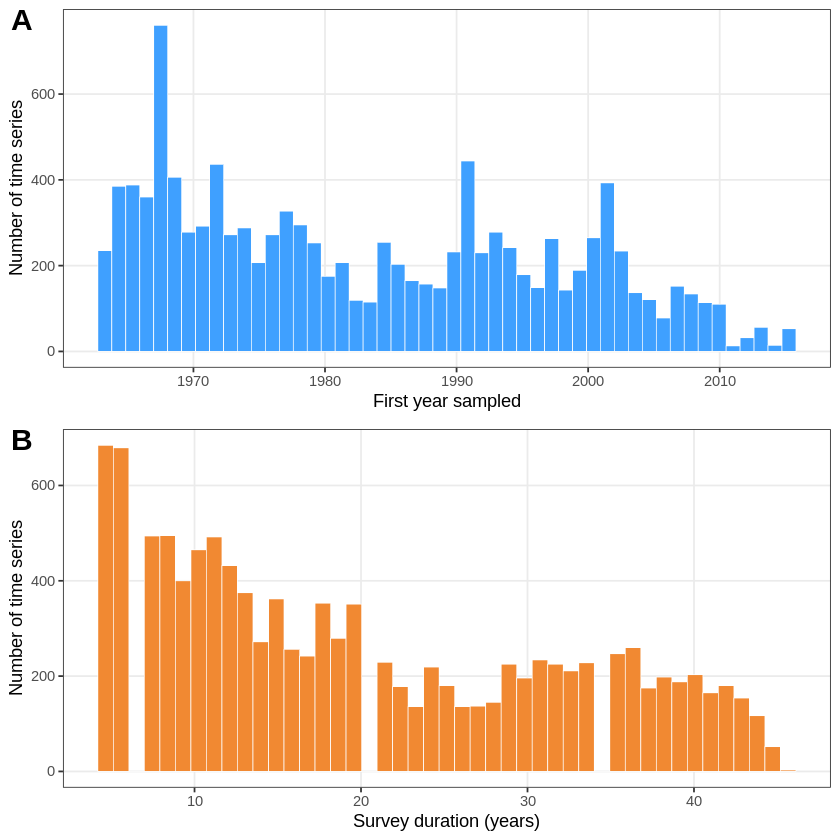

In [22]:
p_first_year <- ggplot() + 
    geom_histogram(aes(x = total_fit_sub_tempPref$min_year.tempPref), bins = 50, fill = '#3FA0FF', color = 'white', size = 0.2) + 
    xlab('First year sampled') + ylab('Number of time series') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
p_duration <- ggplot() + 
    geom_histogram(aes(x = total_fit_sub_tempPref$duration), bins = 45, fill = '#F18932', color = 'white', size = 0.2) + 
    xlab('Survey duration (years)') + ylab('Number of time series') +
    theme_bw() +
    theme(panel.grid.minor = element_blank())
ggpubr::ggarrange(p_first_year,
                  p_duration,
                  ncol = 1, nrow = 2,
                  labels = c("A", "B"),
                  font.label = list(size = 18))
# ggsave('../output/sample_description.pdf', width = 18, height = 12, units = 'cm', scale = 2)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.”


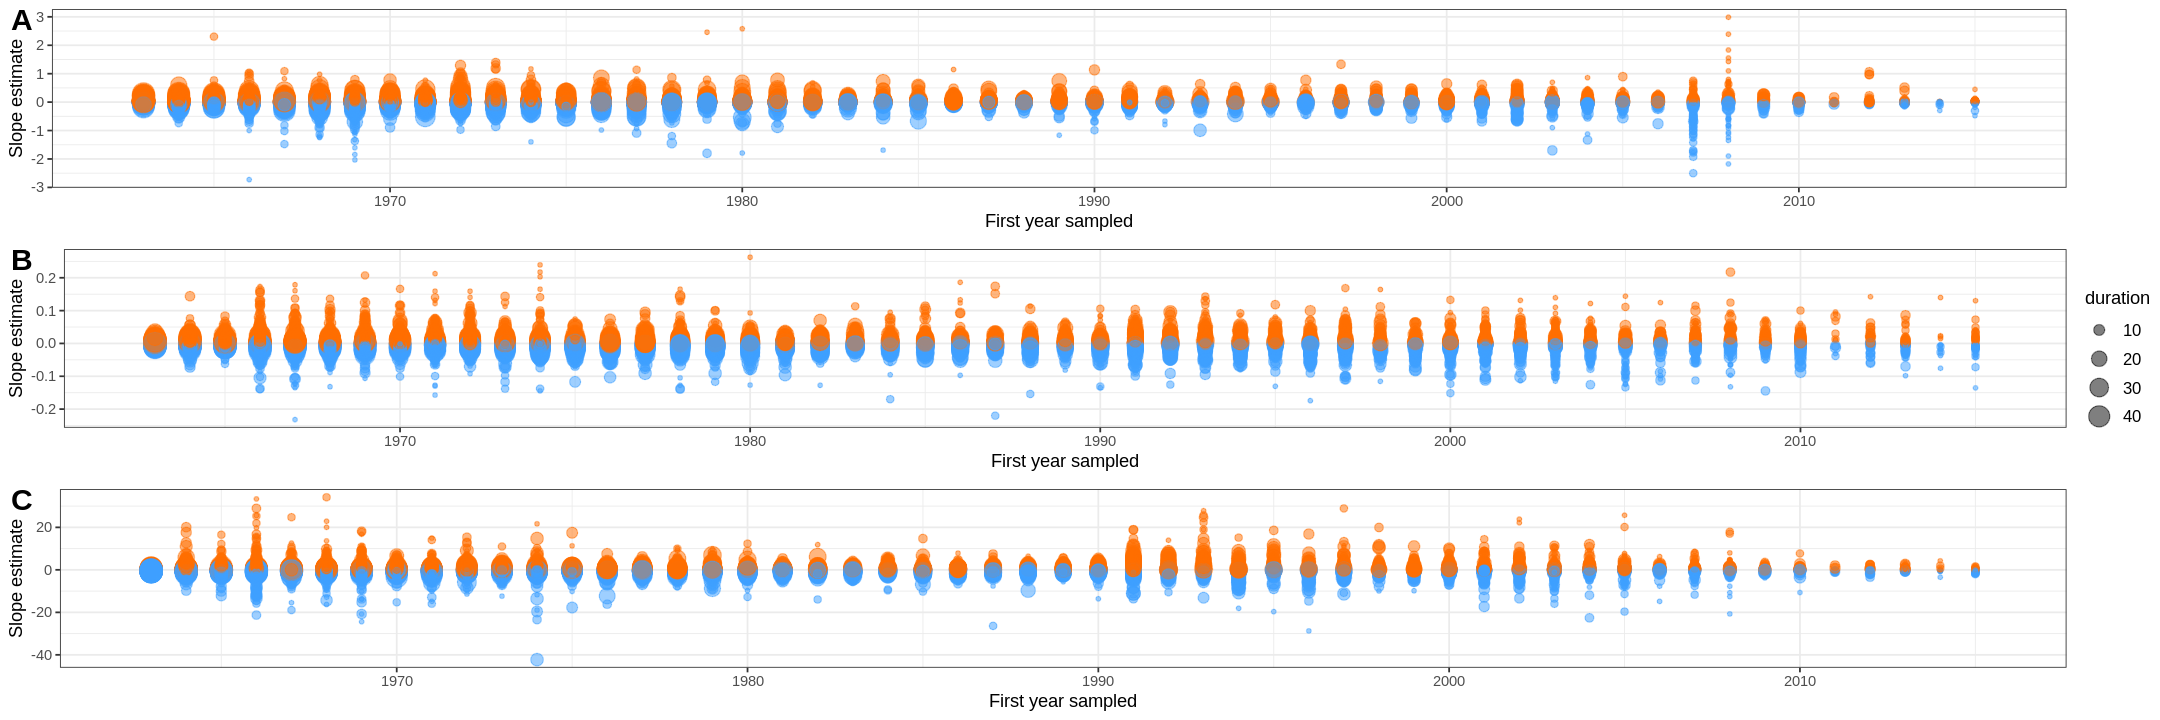

In [147]:
p_time_series_tempPref <- ggplot(data = total_fit_sub_tempPref) + 
    geom_point(aes(x = min_year.tempPref, y = estimate.tempPref, size = duration, color = sig), alpha = 0.5) + 
    scale_color_manual(breaks = c('pos', 'neg'), values = c('#FF6E00', '#3FA0FF')) +
    xlab('First year sampled') + ylab('Slope estimate') +
    guides(color = FALSE) +
    theme_bw() +
    theme(legend.text = element_text(size = 10))
p_time_series_troph <- ggplot(data = total_fit_sub_troph) + 
    geom_point(aes(x = min_year.Troph, y = estimate.Troph, size = duration, color = sig), alpha = 0.5) + 
    scale_color_manual(breaks = c('pos', 'neg'), values = c('#FF6E00', '#3FA0FF')) +
    xlab('First year sampled') + ylab('Slope estimate') +
    guides(color = FALSE) +
    theme_bw() +
    theme(legend.text = element_text(size = 10))
p_time_series_length <- ggplot(data = total_fit_sub_length) + 
    geom_point(aes(x = min_year.maxLengthTL, y = estimate.maxLengthTL, size = duration, color = sig), alpha = 0.5) + 
    scale_color_manual(breaks = c('pos', 'neg'), values = c('#FF6E00', '#3FA0FF')) +
    xlab('First year sampled') + ylab('Slope estimate') +
    guides(color = FALSE) +
    theme_bw() +
    theme(legend.text = element_text(size = 10))
ggpubr::ggarrange(p_time_series_tempPref,
                  p_time_series_troph,
                  p_time_series_length,
                  ncol = 1,
                  labels = c("A", "B", "C"),
                  common.legend = TRUE,
                  legend = 'right',
                  font.label = list(size = 18))
ggsave('../output/sample_slope_series.pdf', width = 18, height = 21, units = 'cm', scale = 1.8)

## latitude pattern

In [55]:
head(total_fit_sub_tempPref)
filter(total_fit_sub_tempPref, estimate.tempPref > 0) %>% pull(estimate.tempPref) %>% mean()
filter(total_fit_sub_tempPref, estimate.tempPref < 0) %>% pull(estimate.tempPref) %>% mean()
filter(total_fit_sub_length, estimate.maxLengthTL > 0) %>% pull(estimate.maxLengthTL) %>% mean()
filter(total_fit_sub_length, estimate.maxLengthTL < 0) %>% pull(estimate.maxLengthTL) %>% mean()
filter(total_fit_sub_troph, estimate.Troph > 0) %>% pull(estimate.Troph) %>% mean()
filter(total_fit_sub_troph, estimate.Troph < 0) %>% pull(estimate.Troph) %>% mean()

dataset_name.tempPref             grid    min_year.tempPref max_year.tempPref
1 biotimeStudyId_45                 5269674 2006              2015             
2 biotimeStudyId_126                 514669 1975              1980             
3 MARMAP Yankee Trawl 1990-2009.csv  514669 1975              1980             
4 biotimeStudyId_126                 516130 1974              1979             
5 MARMAP Yankee Trawl 1990-2009.csv  516130 1974              1980             
6 biotimeStudyId_126                 521222 1973              1978             
  estimate.tempPref p.value.tempPref sst_baseline.tempPref lat.abs  lat.abs_cut
1  0.012723160      0.09948665       27.76394              17.47072 18         
2  0.096892393      0.96723076       24.32237              33.49998 34         
3  0.042198129      0.92916262       24.32237              33.49998 34         
4  1.168835979              NA       24.22783              33.29099 34         
5 -0.009022789      0.86318851       24.22783              33.29099 34         
6 -0.500000000              NA       24.49431              32.72335 34         
  duration sig
1 9        pos
2 5        pos
3 5        pos
4 5        pos
5 6        neg
6 5        neg

[1] 0.08867893

[1] -0.1010647

[1] 1.631411

[1] -1.380961

[1] 0.01724802

[1] -0.01538562

In [44]:
p_tempPref_estimate_point <- ggplot(total_fit_sub_tempPref, aes(x = estimate.tempPref, y = lat.abs, color = sst_baseline.tempPref)) + 
    geom_point() +
    paletteer::scale_colour_paletteer_c("grDevices::Plasma") +
    labs(color = 'SST baseline') + 
    xlab('temperature affinity trend (\u00B0C/yr)') + ylab('Absolute latitude (\u00B0)') +
    theme_bw() +
    theme(legend.position = c(0.8, 0.1), legend.direction = "horizontal", panel.grid.minor = element_blank())
# p_tempPref_estimate_point

In [151]:
p_troph_estimate_point <- ggplot(total_fit_sub_troph, aes(x = estimate.Troph, y = lat.abs, color = sst_baseline.Troph)) + 
    geom_point() +
    paletteer::scale_colour_paletteer_c("grDevices::Plasma") +
    labs(color = 'SST baseline') + 
    xlab('Trophic level trend /yr') + ylab('Absolute latitude (\u00B0)') +
    theme_bw() +
    theme(legend.position = c(0.8, 0.1), legend.direction = "horizontal", panel.grid.minor = element_blank())
# p_troph_estimate_point

In [152]:
p_length_estimate_point <- ggplot(total_fit_sub_length, aes(x = estimate.maxLengthTL, y = lat.abs, color = sst_baseline.maxLengthTL)) + 
    geom_point() +
    paletteer::scale_colour_paletteer_c("grDevices::Plasma") +
    labs(color = 'SST baseline') + 
    xlab('length trend (cm/yr)') + ylab('Absolute latitude (\u00B0)') +
    theme_bw() +
    theme(legend.position = c(0.8, 0.1), legend.direction = "horizontal", panel.grid.minor = element_blank())
# p_length_estimate_point

In [153]:
p_sst_estimate_point <- ggplot(total_fit_xy, aes(x = sst_estimate.tempPref, y = abs(lat), color = sst_baseline.tempPref)) + 
    geom_point() +
    paletteer::scale_colour_paletteer_c("grDevices::Plasma") +
    labs(color = 'SST baseline') + 
    xlab('SST trend (\u00B0C/yr)') + ylab('Absolute latitude (\u00B0)') +
    theme_bw() +
    theme(legend.position = c(0.8, 0.1), legend.direction = "horizontal", panel.grid.minor = element_blank())
# p_sst_estimate_point 

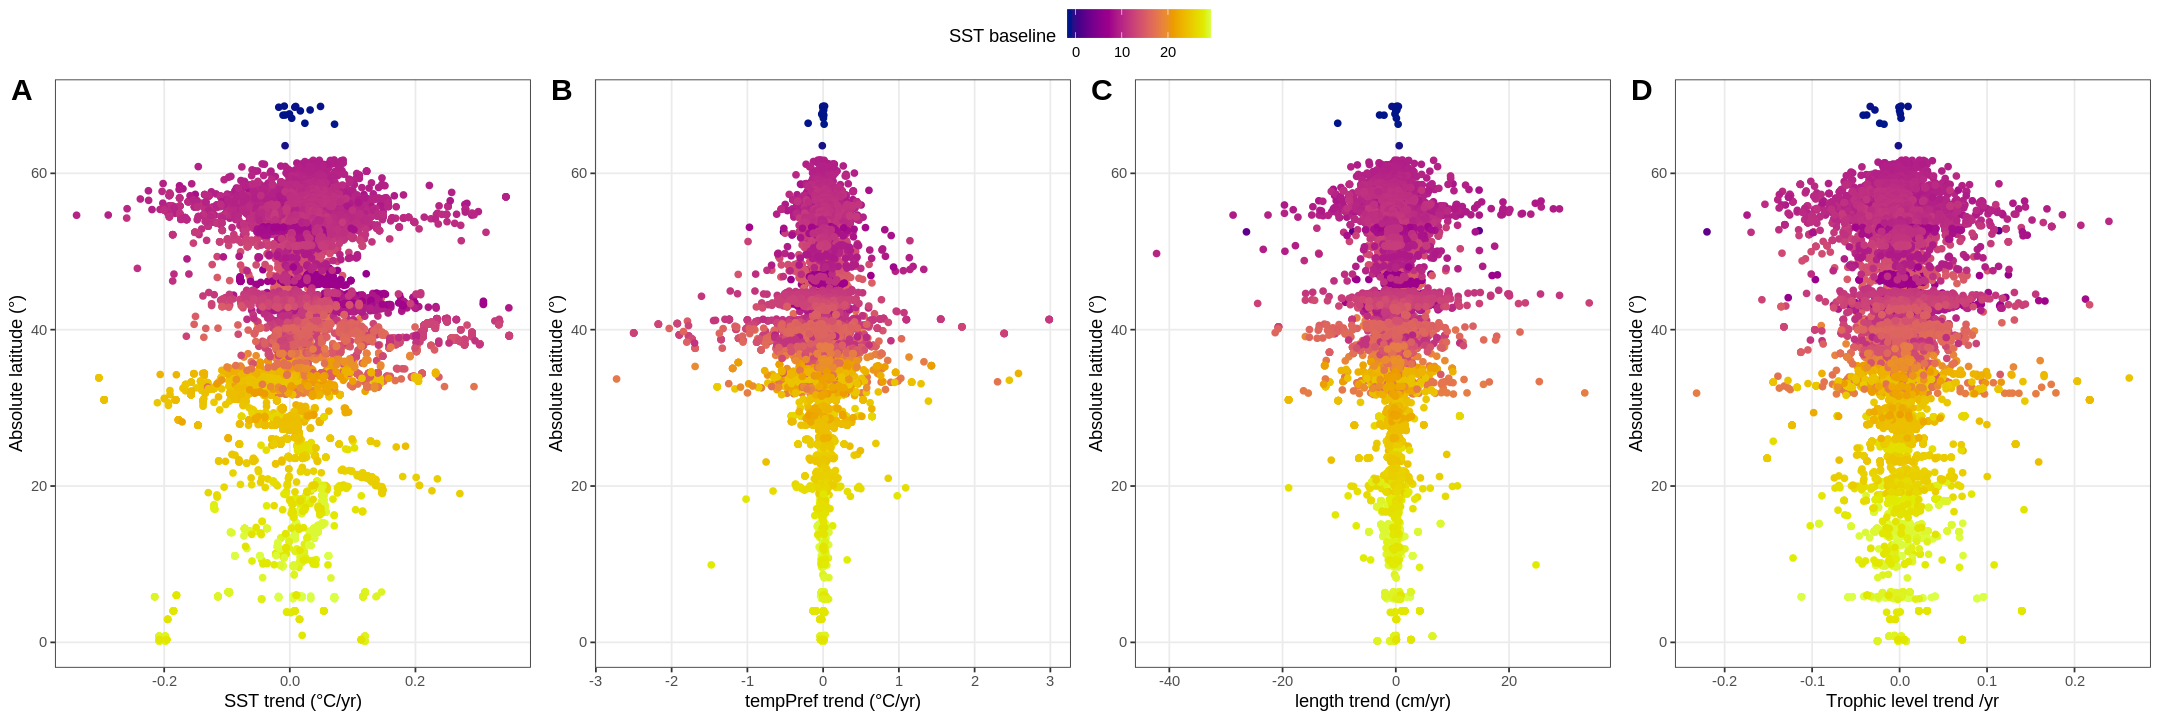

In [154]:
options(repr.plot.width = 18, repr.plot.height = 6)
ggpubr::ggarrange(p_sst_estimate_point,
                  p_tempPref_estimate_point,
                  p_length_estimate_point,
                  p_troph_estimate_point,
                  ncol = 4, nrow = 1,
                  labels = c("A", "B", "C", "D"),
                  font.label = list(size = 18),
                  common.legend = T)
ggsave('../output/hist_point_combination.pdf', width = 18, height = 6, units = 'cm', scale = 3)

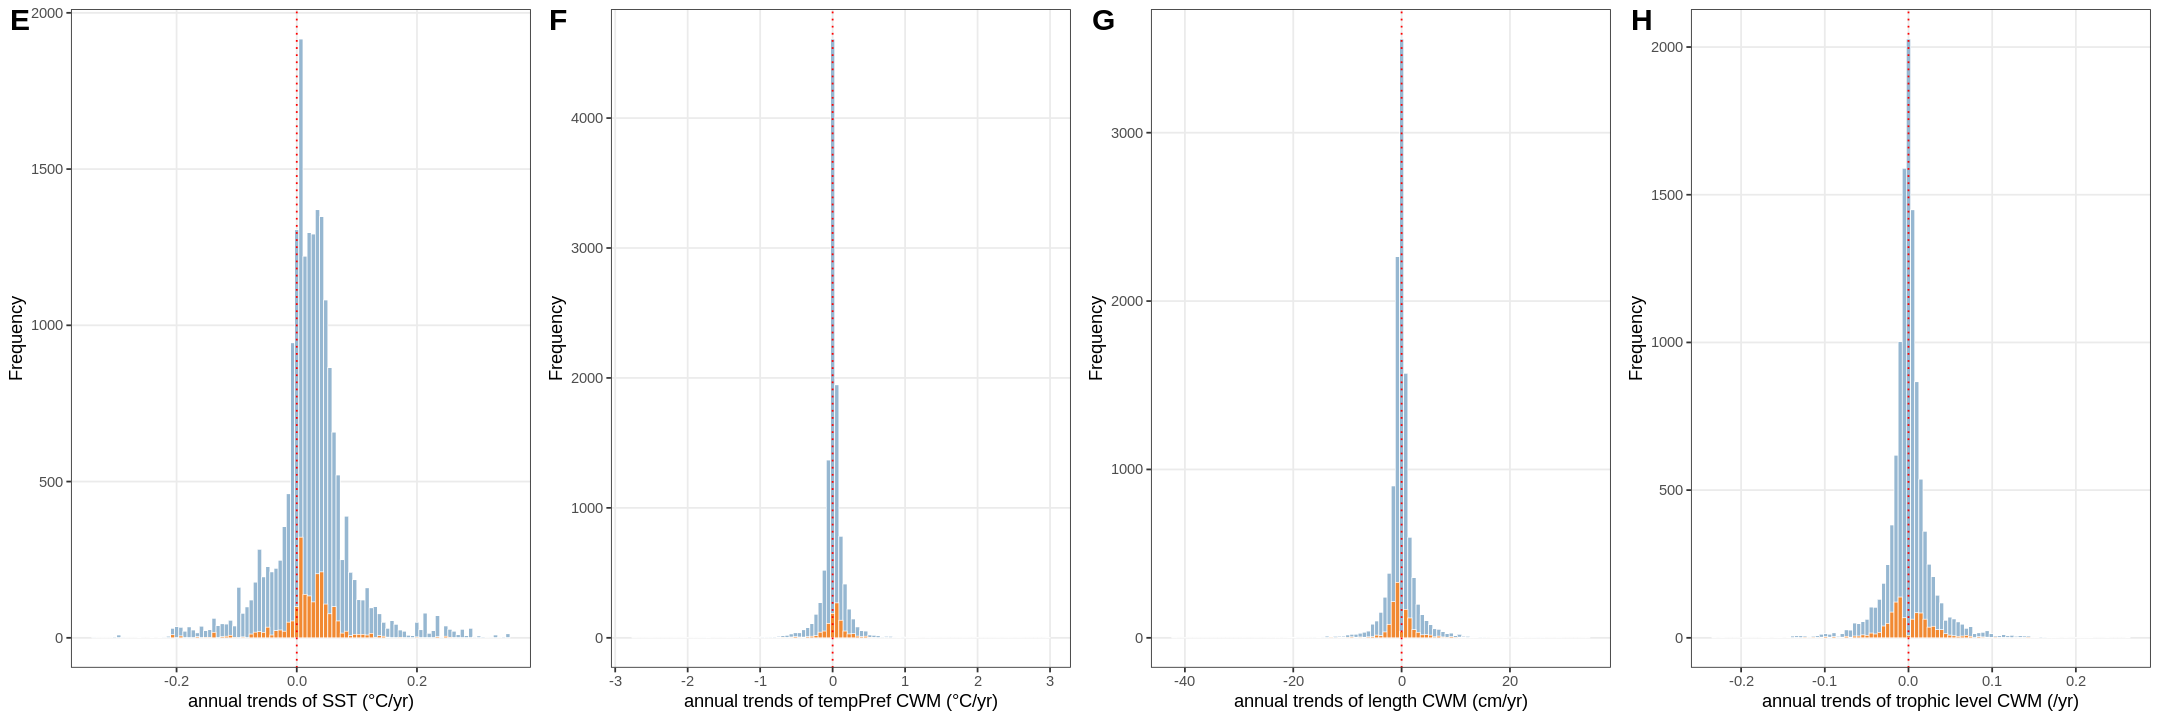

In [155]:
load('../output/sst_table_for_hist.RData')
hist_sst <- readRDS('../output/hist_sst.rds')
ggpubr::ggarrange(hist_sst,
                  hist_tempPref,
                  hist_maxlengthTL,
                  hist_Troph,
                  ncol = 4, nrow = 1,
                  labels = c("E", "F", "G", "H"),
                  font.label = list(size = 18))
ggsave('../output/hist_combination.pdf', width = 18, height = 3, units = 'cm', scale = 3)
# ggsave('../output//hist_combination.tiff', width = 10, height = 1.7, units = 'cm', scale = 3, dpi = 300)

In [52]:
latitude_cut_table_tempPref <- group_by(total_fit_sub_tempPref, lat.abs_cut) %>% 
    summarise(estimate_mean = mean(estimate.tempPref, na.rm = T), estimate_sd = sd(estimate.tempPref, na.rm = T)) %>% 
    pivot_longer(!lat.abs_cut, names_to = 'term', values_to = 'value') %>% 
    mutate(trait = rep('temperature affinity', nrow(.)))
latitude_cut_table_length <- group_by(total_fit_sub_length, lat.abs_cut) %>% 
    summarise(estimate_mean = mean(estimate.maxLengthTL, na.rm = T), estimate_sd = sd(estimate.maxLengthTL, na.rm = T)) %>% 
    pivot_longer(!lat.abs_cut, names_to = 'term', values_to = 'value') %>% 
    mutate(trait = rep('length', nrow(.)))
latitude_cut_table_troph <- group_by(total_fit_sub_troph, lat.abs_cut) %>% 
    summarise(estimate_mean = mean(estimate.Troph, na.rm = T), estimate_sd = sd(estimate.Troph, na.rm = T)) %>% 
    pivot_longer(!lat.abs_cut, names_to = 'term', values_to = 'value') %>% 
    mutate(trait = rep('troph', nrow(.)))

latitude_cut_table <- bind_rows(latitude_cut_table_tempPref, latitude_cut_table_length, latitude_cut_table_troph)
latitude_cut_table$trait <- factor(latitude_cut_table$trait, levels = c('temperature affinity', 'length', 'troph'))

p_latitude_cut <- ggplot(data = latitude_cut_table, aes(x = lat.abs_cut, y = value, color = term)) +
    geom_point() +
    geom_smooth() +
    facet_wrap(~ trait, scales = 'free_y')+
    theme_bw()
ggsave('../output/latitude_cut.svg', p_latitude_cut, width = 6, height = 1.5, scale = 2.5)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


## spatial pattern

In [81]:
sst_significant_change <- readRDS('../output/sst_significant_change.rds')
p_significant_change_tempPref <- readRDS('../output/p_significant_change_tempPref.rds')
p_significant_change_maxlengthTL <- readRDS('../output/p_significant_change_maxlengthTL.rds')
p_significant_change_Troph <- readRDS('../output/p_significant_change_Troph.rds')

Warning message in abbreviate_shapefile_names(obj):
“Field names abbreviated for ESRI Shapefile driver”


Writing layer `surveyed_grid_points_map' to data source 
  `../output/surveyed_grid_points_map/surveyed_grid_points_map.shp' using driver `ESRI Shapefile'
Writing 10027 features with 3 fields and geometry type Point.


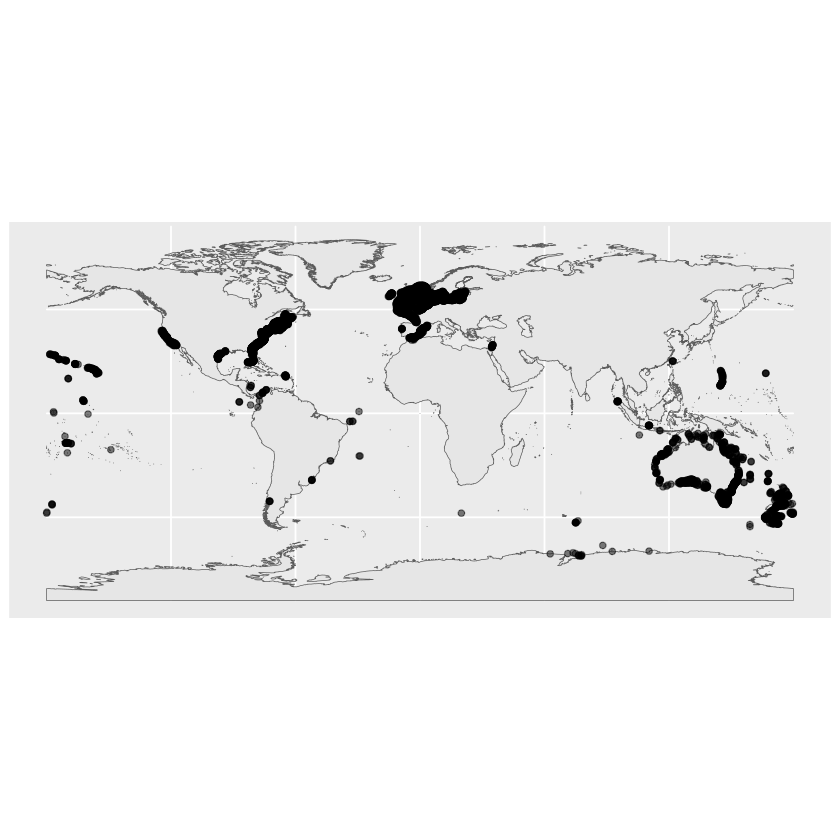

In [80]:
survey_grid_map <- filter(grid_point, seqnum %in% unique(total_fit$grid))
ggplot() +
    geom_sf(data = ocean_map, aes(geometry = geometry), fill = '#e6e6e6') + 
    geom_sf(data = survey_grid_map, 
            aes(geometry = geometry), alpha = 0.5)
st_write(survey_grid_map, '../output/surveyed_grid_points_map/surveyed_grid_points_map.shp')

In [69]:
head(grid_current)

matrix.unlist.grid_current...nrow...length.grid_current...byrow...TRUE.
1 NA                                                                     
2 NA                                                                     
3 NA                                                                     
4 NA                                                                     
5 NA                                                                     
6 NA

Reading layer `current' from data source 
  `/Share/user/picapica/marine_global_change/world_ocean_climate/current/current.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -133.88 ymin: -58.67658 xmax: 181.8601 ymax: 71.5009
Geodetic CRS:  WGS 84


although coordinates are longitude/latitude, st_intersects assumes that they
are planar

although coordinates are longitude/latitude, st_intersects assumes that they
are planar



[1] 5515


      Brazil   California E. Australia  Gulf Stream     Kuroshio    Norwegian 
           7          150         1024         3765            4         1031 
        Peru W. Australia 
           4           39 


	Welch Two Sample t-test

data:  estimate.tempPref by attr
t = 0.9474, df = 207.48, p-value = 0.3445
alternative hypothesis: true difference in means between group cold and group warm is not equal to 0
95 percent confidence interval:
 -0.01575524  0.04490689
sample estimates:
mean in group cold mean in group warm 
       0.016748329        0.002172503 


Warning message:
“Removed 35 rows containing non-finite values (`stat_boxplot()`).”


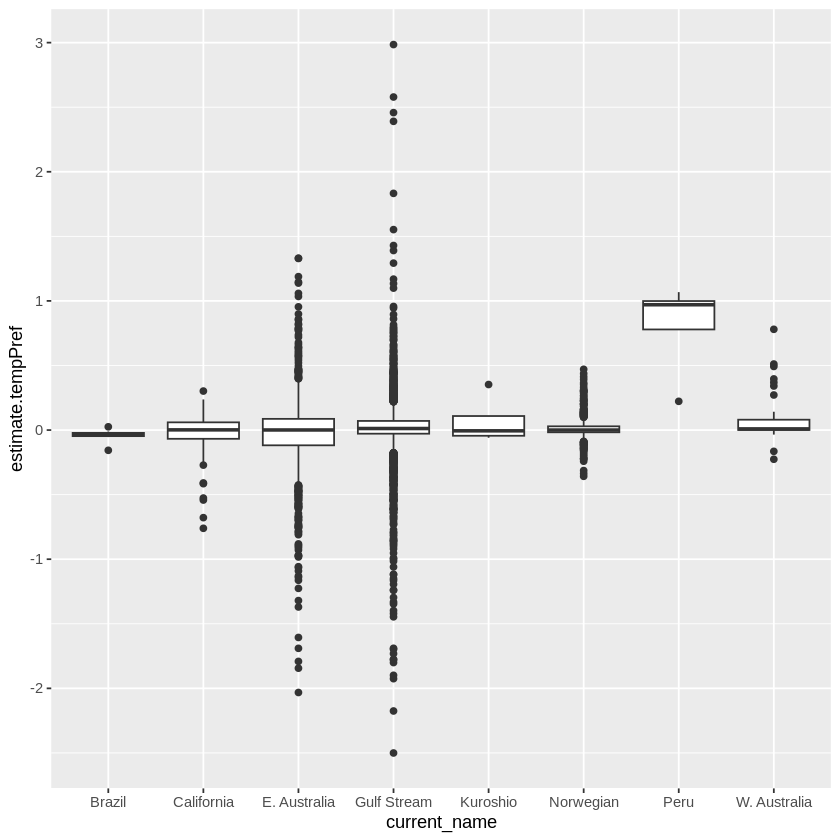

In [81]:
current <- st_read('current/current.shp')
grid_current <- st_intersects(grid_point, current)
grid_current <- lapply(grid_current, function(i)replace(i, length(i) == 0, NA))
grid_current <- data.frame(matrix(unlist(grid_current), nrow = length(grid_current), byrow = TRUE))
colnames(grid_current) <- 'current_no'
grid_point$current_name <- current$current[grid_current$current_no] %>% as.character()
n_distinct(filter(grid_point, !is.na(current_name))) # grids influenced by the current

total_fit_sub_tempPref_current <- filter(grid_point, !is.na(current_name)) %>%
    st_set_geometry(NULL) %>% 
    left_join(total_fit_sub_tempPref, by = c('seqnum' = 'grid')) %>% 
    left_join(current, by = c('current_name' = 'current'))
table(total_fit_sub_tempPref_current$current_name)
t.test(estimate.tempPref ~ attr, total_fit_sub_tempPref_current)

ggplot(total_fit_sub_tempPref_current, aes(x = current_name, y = estimate.tempPref)) +
    geom_boxplot()

Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”
Warning message:
“Couldn't find `x` and `y` to build convex hull.
Falling back to shape = "rect"”


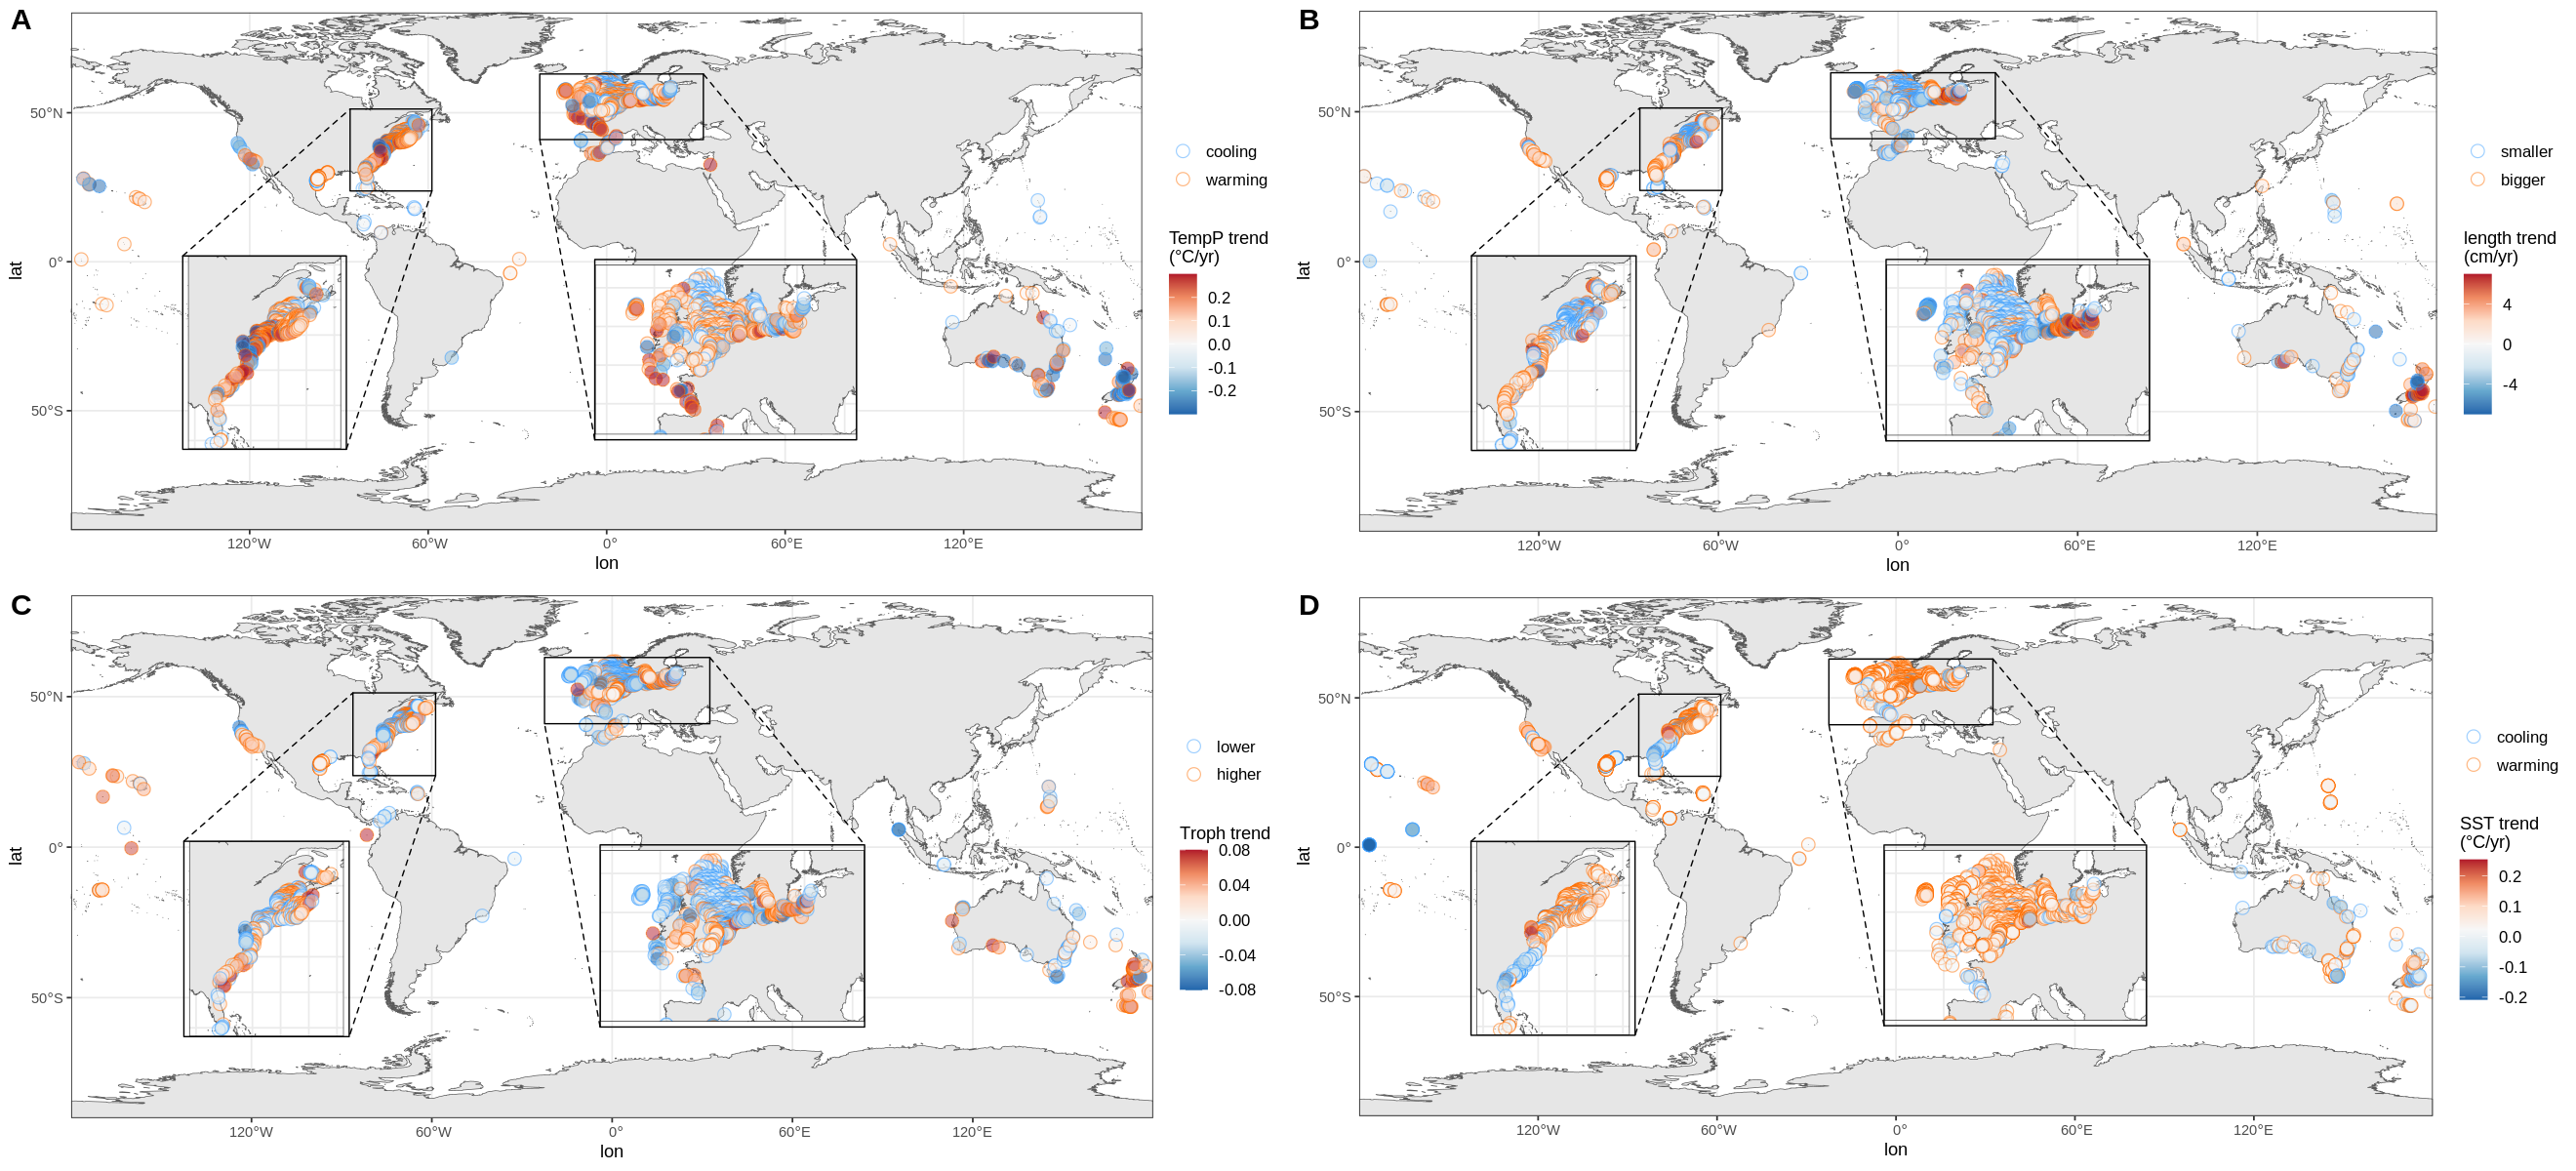

In [156]:
options(repr.plot.width = 22, repr.plot.height = 10)
p_significant_change_combination <- ggpubr::ggarrange(p_significant_change_tempPref,
                  p_significant_change_maxlengthTL,
                  p_significant_change_Troph,
                  sst_significant_change,
                  ncol = 2, nrow = 2,
                  labels = c("a", "b", "c", "d"),
                  font.label = list(size = 24))
# ggsave('../output/significant_change_combination.pdf', width = 8.67, height = 3.94, units = 'in', scale = 3)
ggsave('../output/significant_change_combination_adj.size.tiff', p_significant_change_combination, width = 18, height = 8.2, units = 'cm', scale = 6, dpi = 300)